# 3dasm Project

## Agenda
1. [Phase 1: Gaussian Process on Simulated Data only](#Phase-1:-Gaussian-Process-on-Simulated-Data-only)
2. [Training with Different Kernels: common Constant*RBF kernel with an optimizer fmin_1_bfgs_b](#Training-with-Different-Kernels:-common-Constant*RBF-kernel-with-an-optimizer-fmin_1_bfgs_b)
3. [Training with Different Kernels: ExpSineSquared with an optimizer fmin_1_bfgs_b](#Training-with-Different-Kernels:-ExpSineSquared-with-an-optimizer-fmin_1_bfgs_b)
4. [Training with Different Kernels: Matern with an optimizer fmin_1_bfgs_b](#Training-with-Different-Kernels:-Matern-with-an-optimizer-fmin_1_bfgs_b)
5. [Training with Different Kernels: common Constant*RBF kernel With No Optimizer](#Training-with-Different-Kernels:-common-Constant*RBF-kernel-With-No-Optimizer)
6. [Training with Different Kernels: ExpSineSquared with no optimizer](#Training-with-Different-Kernels:-ExpSineSquared-with-no-optimizer)
7. [Training with Different Kernels: Matern with no optimizer](#Training-with-Different-Kernels:-Matern-with-no-optimizer)
8. [Phase 1.5: Gaussian Process on Experimental Data Only](#Phase-1.5:-Gaussian-Process-on-Experimental-Data-Only)
9. [Training with Different kernels: common Constant*RBF kernel with an optimizer fmin_1_bfgs_b](#Training-with-Different-kernels:-common-Constant*RBF-kernel-with-an-optimizer-fmin_1_bfgs_b)
10. [Training with Different Kernels: ExpSineSquared with an optimizer fmin_1_bfgs_b](#Training-with-Different-Kernels:-ExpSineSquared-with-an-optimizer-fmin_1_bfgs_b)
11. [Training with Different Kernels: Matern with an optimizer fmin_1_bfgs_b](#Training-with-Different-Kernels:-Matern-with-an-optimizer-fmin_1_bfgs_b)
12. [Phase 2: Training with Simulation Data and Testing with Experimental Data](#Phase-2:-Training-with-Simulation-Data-and-Testing-with-Experimental-Data)
13. [Constant Kernel and  f_min optimizer](#Constant-Kernel-and-f_min-optimizer)
14. [Matern kernel with no optimizer](#Matern-kernel-with-no-optimizer)
15. [Phase 3: Multi-fidelity Gaussian Process](#Phase-3:-Multi-fidelity-Gaussian-Process)
16. [Phase 4: Error Metrics](#Phase-4:-Error-Metrics)

### Importing necessary packages

In [1]:
import matplotlib.pyplot as plt # import plotting tools to create figures
import numpy as np # import numpy to handle a lot of things!
from IPython.display import display, Math # to print with Latex math
import pandas as pd

%config InlineBackend.figure_format = "retina" # render higher resolution images in the notebook
plt.rcParams["figure.figsize"] = (8,4) # rescale figure size appropriately for slides

In [2]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, ExpSineSquared, ConstantKernel, WhiteKernel

<a id='Phase 1: Gaussian Process on Simulated Data only'></a>

## Phase 1: Gaussian Process on Simulated Data only

In [3]:
sim_df = pd.read_csv("/users/mcarcana/3dasm_data/sim_data/neoHookean/data_0_0.csv") # read pandas DataFrame
print("Show the simulated DataFrameused for training data:\n", sim_df)

Show the simulated DataFrameused for training data:
            -1         1
0   -0.999998  1.000000
1   -0.999996  1.000000
2   -0.999994  1.000000
3   -0.999992  1.000000
4   -0.999981  1.000000
..        ...       ...
743  0.977361 -0.139929
744  0.983021 -0.139361
745  0.988681 -0.138257
746  0.994340 -0.136659
747  1.000000 -0.134620

[748 rows x 2 columns]


In [4]:
Data_x = sim_df.iloc[:,0] # select the input VALUES from your dataframe into Data_x
Data_y = sim_df.iloc[:,1] # select the output VALUES from your dataframe inta Data_y
print("Data_x is:\n",Data_x)
print("\nData_y is:\n",Data_y)

Data_x is:
 0     -0.999998
1     -0.999996
2     -0.999994
3     -0.999992
4     -0.999981
         ...   
743    0.977361
744    0.983021
745    0.988681
746    0.994340
747    1.000000
Name: -1, Length: 748, dtype: float64

Data_y is:
 0      1.000000
1      1.000000
2      1.000000
3      1.000000
4      1.000000
         ...   
743   -0.139929
744   -0.139361
745   -0.138257
746   -0.136659
747   -0.134620
Name: 1, Length: 748, dtype: float64


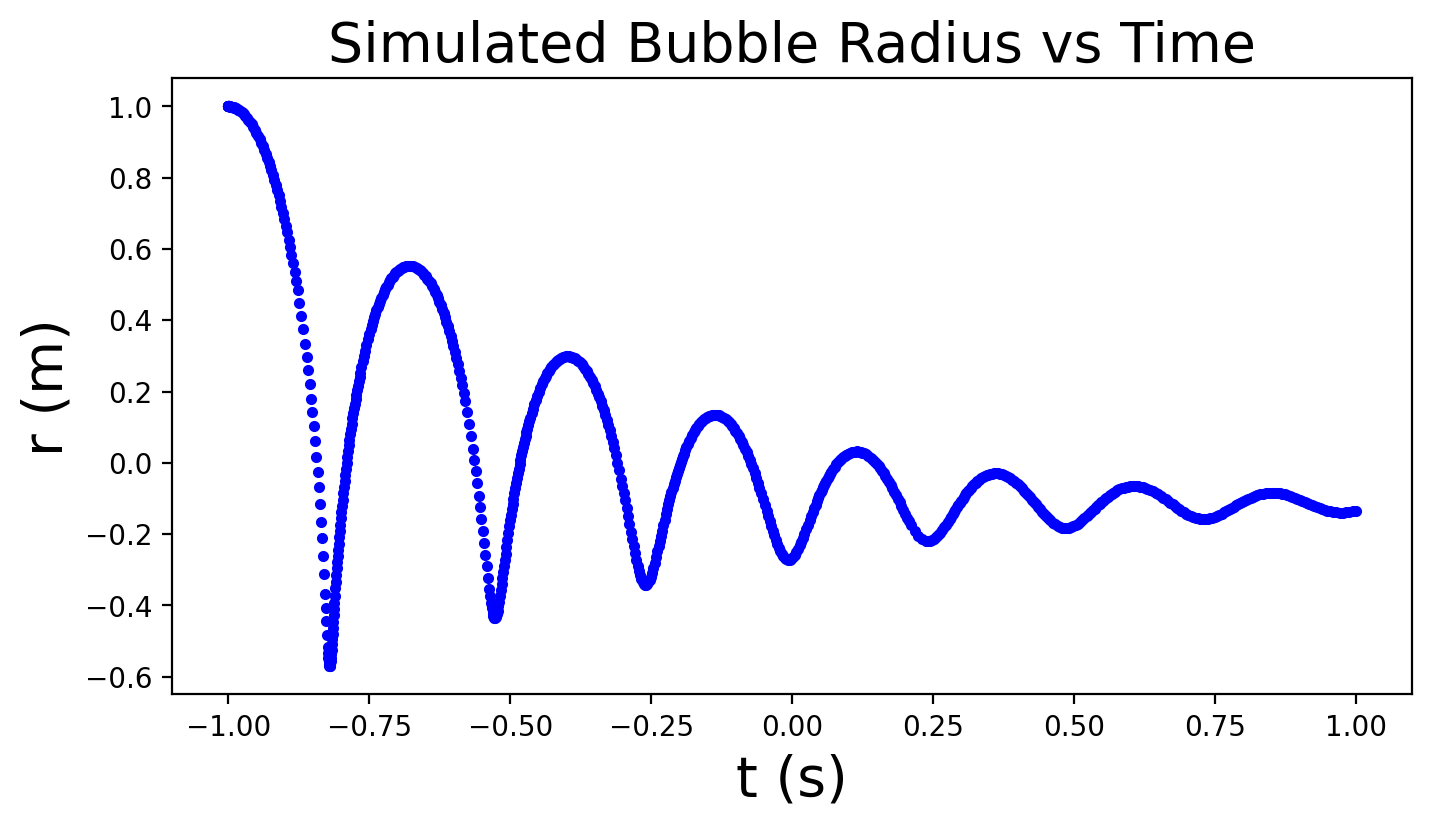

In [5]:
fig_sim_data, ax_sim_data = plt.subplots() # create a plot
ax_sim_data.plot(Data_x, Data_y, 'b.')
ax_sim_data.set_xlabel("t (s)", fontsize=20) # create x-axis label with font size 20
ax_sim_data.set_ylabel("r (m)", fontsize=20) # create y-axis label with font size 20
ax_sim_data.set_title("Simulated Bubble Radius vs Time", fontsize=20); # create title with font size 20
plt.show(fig_sim_data)

In [6]:
from sklearn.model_selection import train_test_split

n_data = 50 # number of points in our dataset
testset_ratio = 0.10 # ratio of test set points from the dataset

X_data = np.reshape(Data_x,(-1,1)) # a 2D array that scikit-learn likes

seed = 1987 # set a random seed so that everyone gets the same result
np.random.seed(seed)

# Let's split into 10% training points and the rest for testing:
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                    Data_y, test_size=testset_ratio,
                                    random_state=seed)

x_train = X_train.ravel() # just for plotting later
x_test = X_test.ravel() # just for plotting later

print("Here's a print of X_train:\n", X_train)

Here's a print of X_train:
 [[ 0.58455099]
 [-0.92882976]
 [ 0.93583242]
 [-0.35293144]
 [-0.699745  ]
 [-0.80257151]
 [-0.23081673]
 [-0.80857867]
 [-0.77985894]
 [-0.47427582]
 [ 0.47536199]
 [-0.99999792]
 [-0.62572826]
 [-0.13341735]
 [-0.89580682]
 [-0.99609725]
 [-0.81023892]
 [ 0.45090466]
 [ 0.53986777]
 [-0.76180288]
 [-0.65769511]
 [-0.02891035]
 [ 0.44718319]
 [ 0.62205128]
 [-0.8139813 ]
 [-0.31580888]
 [-0.48352401]
 [-0.90595561]
 [ 0.91360001]
 [-0.50332565]
 [-0.26741117]
 [ 0.81363938]
 [-0.20127528]
 [-0.52507272]
 [-0.29874832]
 [ 0.29752197]
 [-0.12747816]
 [ 0.68272193]
 [ 0.14327844]
 [-0.53605844]
 [-0.37929663]
 [ 0.49531435]
 [ 0.69067257]
 [ 0.13542775]
 [-0.99984589]
 [-0.68818015]
 [-0.28851998]
 [-0.46787603]
 [-0.24837642]
 [-0.99995002]
 [-0.80617203]
 [ 0.0280138 ]
 [-0.72221941]
 [-0.48975109]
 [-0.01825886]
 [-0.18749713]
 [-0.51665122]
 [-0.07509093]
 [-0.2810309 ]
 [-0.78524273]
 [-0.4727828 ]
 [ 0.09055023]
 [-0.95313491]
 [ 0.56683419]
 [-0.2859629

In [7]:
n_max = np.max(X_data)
n_min = np.min(X_data)
print(n_max)
print(n_min)

# Define points used for plotting
n_plot = 500 # number of points used for plotting the model
n_max = np.max(X_data)
x_plot = np.linspace(n_min, n_max, n_plot) # create dataset with uniformly spaced points
X_plot = np.reshape(x_plot,(-1,1)) # a 2D array that scikit-learn likes

1.0
-0.999997917422242


<b id='Training with Different Kernels: common Constant*RBF kernel with an optimizer fmin_1_bfgs_b'></b>

### Training with Different Kernels: common Constant*RBF kernel with an optimizer fmin_1_bfgs_b

In [9]:
# Define the kernel function
kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)) # This is the very common Constant*RBF kernel

gp_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=20)
#gp_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-10, optimizer=None, n_restarts_optimizer=20)

# Fit to data to determine parameters
gp_model.fit(X_train, y_train)

# Make the prediction on the entire dataset (for plotting)
y_plot_pred, sigma_plot = gp_model.predict(X_plot, return_std=True) # also output the uncertainty (std)

# Predict for test set (for error metric)
y_pred, sigma = gp_model.predict(X_test, return_std=True) # also output the uncertainty (std)

In [10]:
# Plot the prediction and the 95% confidence interval
fig1, ax1 = plt.subplots()

ax1.plot(x_plot, y_plot_pred, 'b-', label="GPR prediction")
ax1.fill(np.concatenate([x_plot, x_plot[::-1]]),
         np.concatenate([y_plot_pred - 1.9600 * sigma_plot,
                        (y_plot_pred + 1.9600 * sigma_plot)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

ax1.set_xlabel('$t (s)$', fontsize=20)
ax1.set_ylabel('$r (m)$', fontsize=20)
ax1.set_title("Posterior kernel: %s"
              % gp_model.kernel_, fontsize=20) # Show in the title the value of the hyperparameters
ax1.legend(loc='upper left', fontsize=15)
fig1.set_size_inches(8,8)
plt.close(fig1) # close the plot to see it in next cell

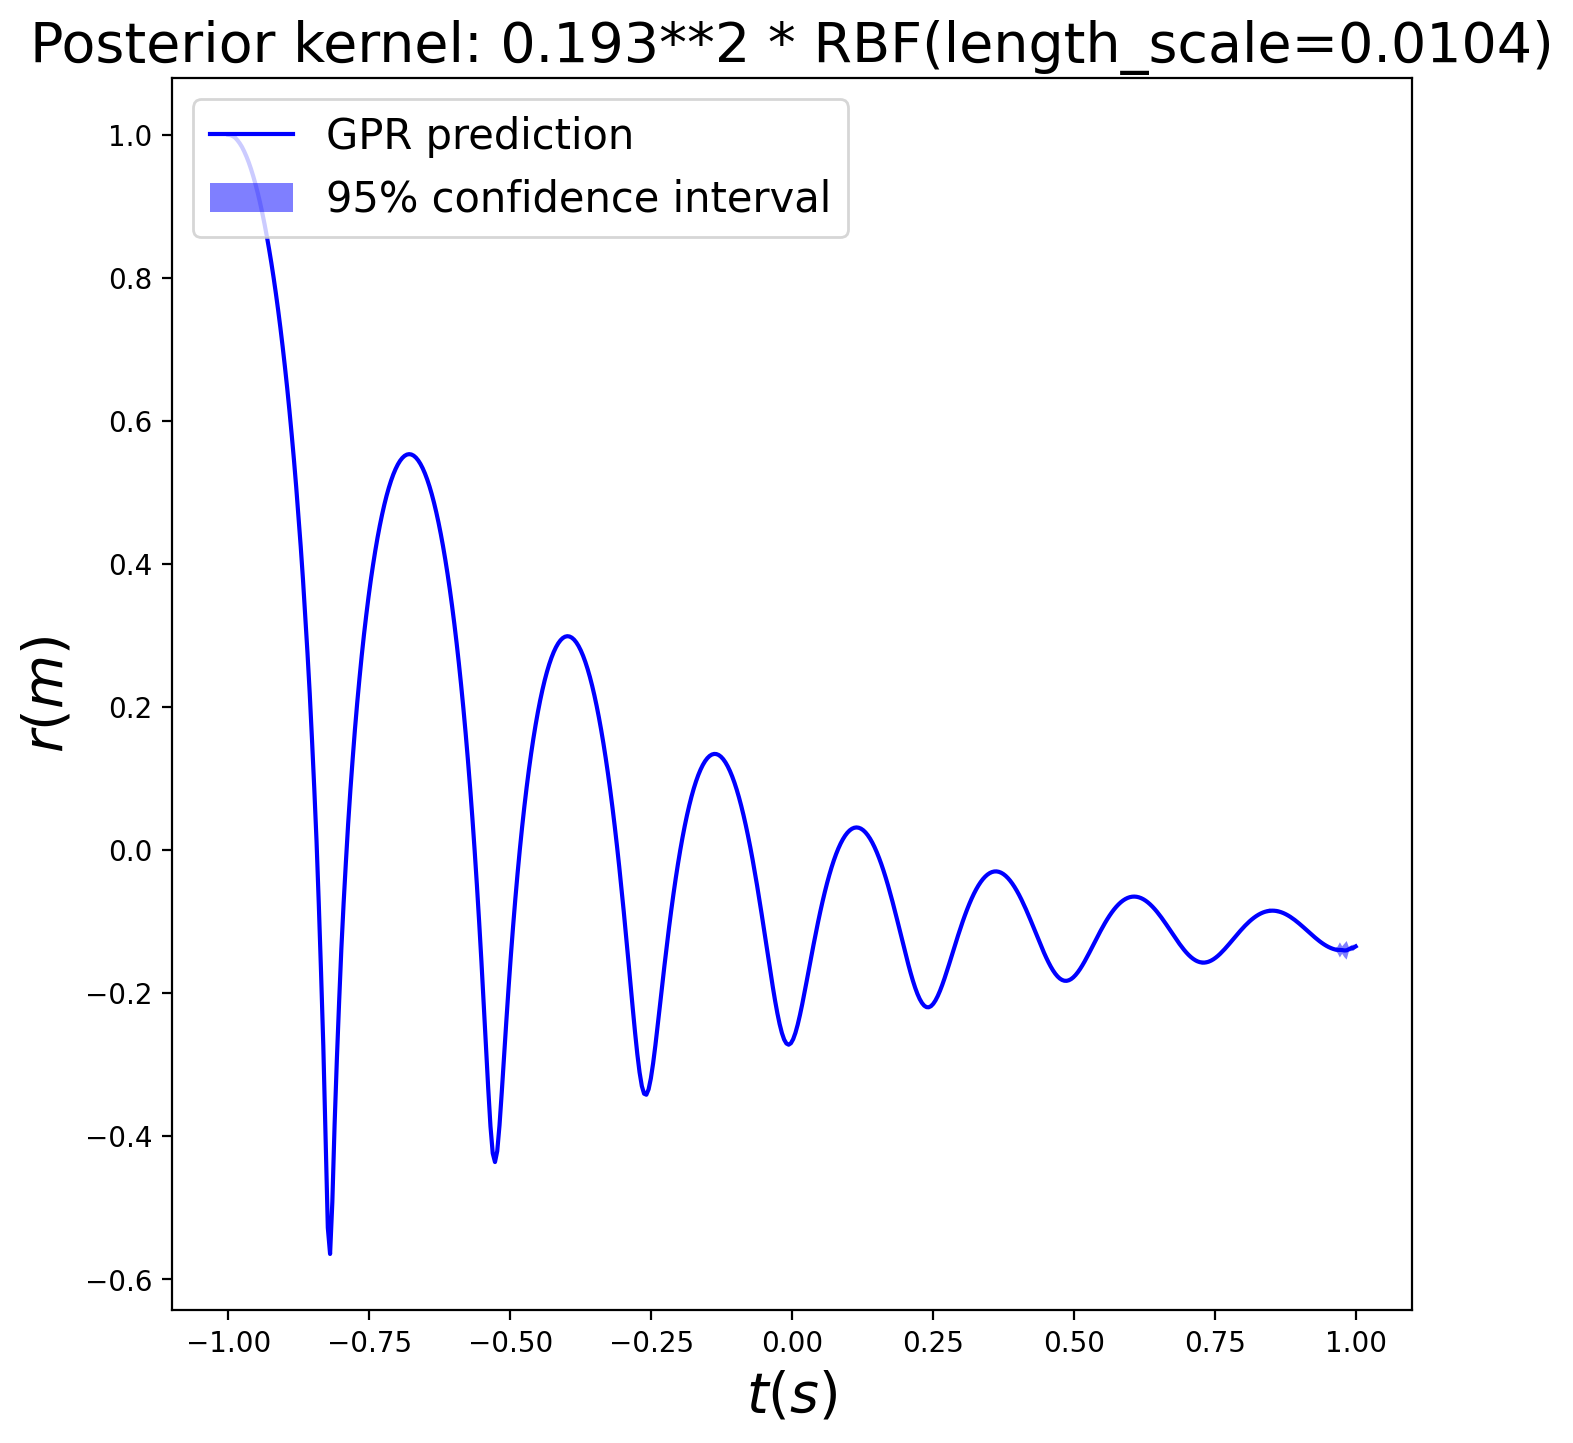

In [11]:
fig1

In [12]:
# Plot the function, the prediction and the 95% confidence interval
fig2, ax2 = plt.subplots()

ax2.plot(x_plot, y_plot_pred, 'b-', label="GPR prediction")
ax2.fill(np.concatenate([x_plot, x_plot[::-1]]),
         np.concatenate([y_plot_pred - 1.9600 * sigma_plot,
                        (y_plot_pred + 1.9600 * sigma_plot)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

ax2.plot(x_train, y_train, 'ro', markersize=6, label="training points") # noiseless data
ax2.plot(x_test, y_test, 'kX', markersize=6, label="testing points") # Plot test points

ax2.set_xlabel('$t (s)$', fontsize=20)
ax2.set_ylabel('$r (m)$', fontsize=20)
ax2.set_title("Posterior kernel: %s"
              % gp_model.kernel_, fontsize=20) # Show in the title the value of the hyperparameters
#ax2.set_ylim(-10, 15) # just to provide more space for the legend
ax2.legend(loc='upper left', fontsize=15)
fig2.set_size_inches(8,8)
plt.close(fig2) # close the plot to see it in next cell

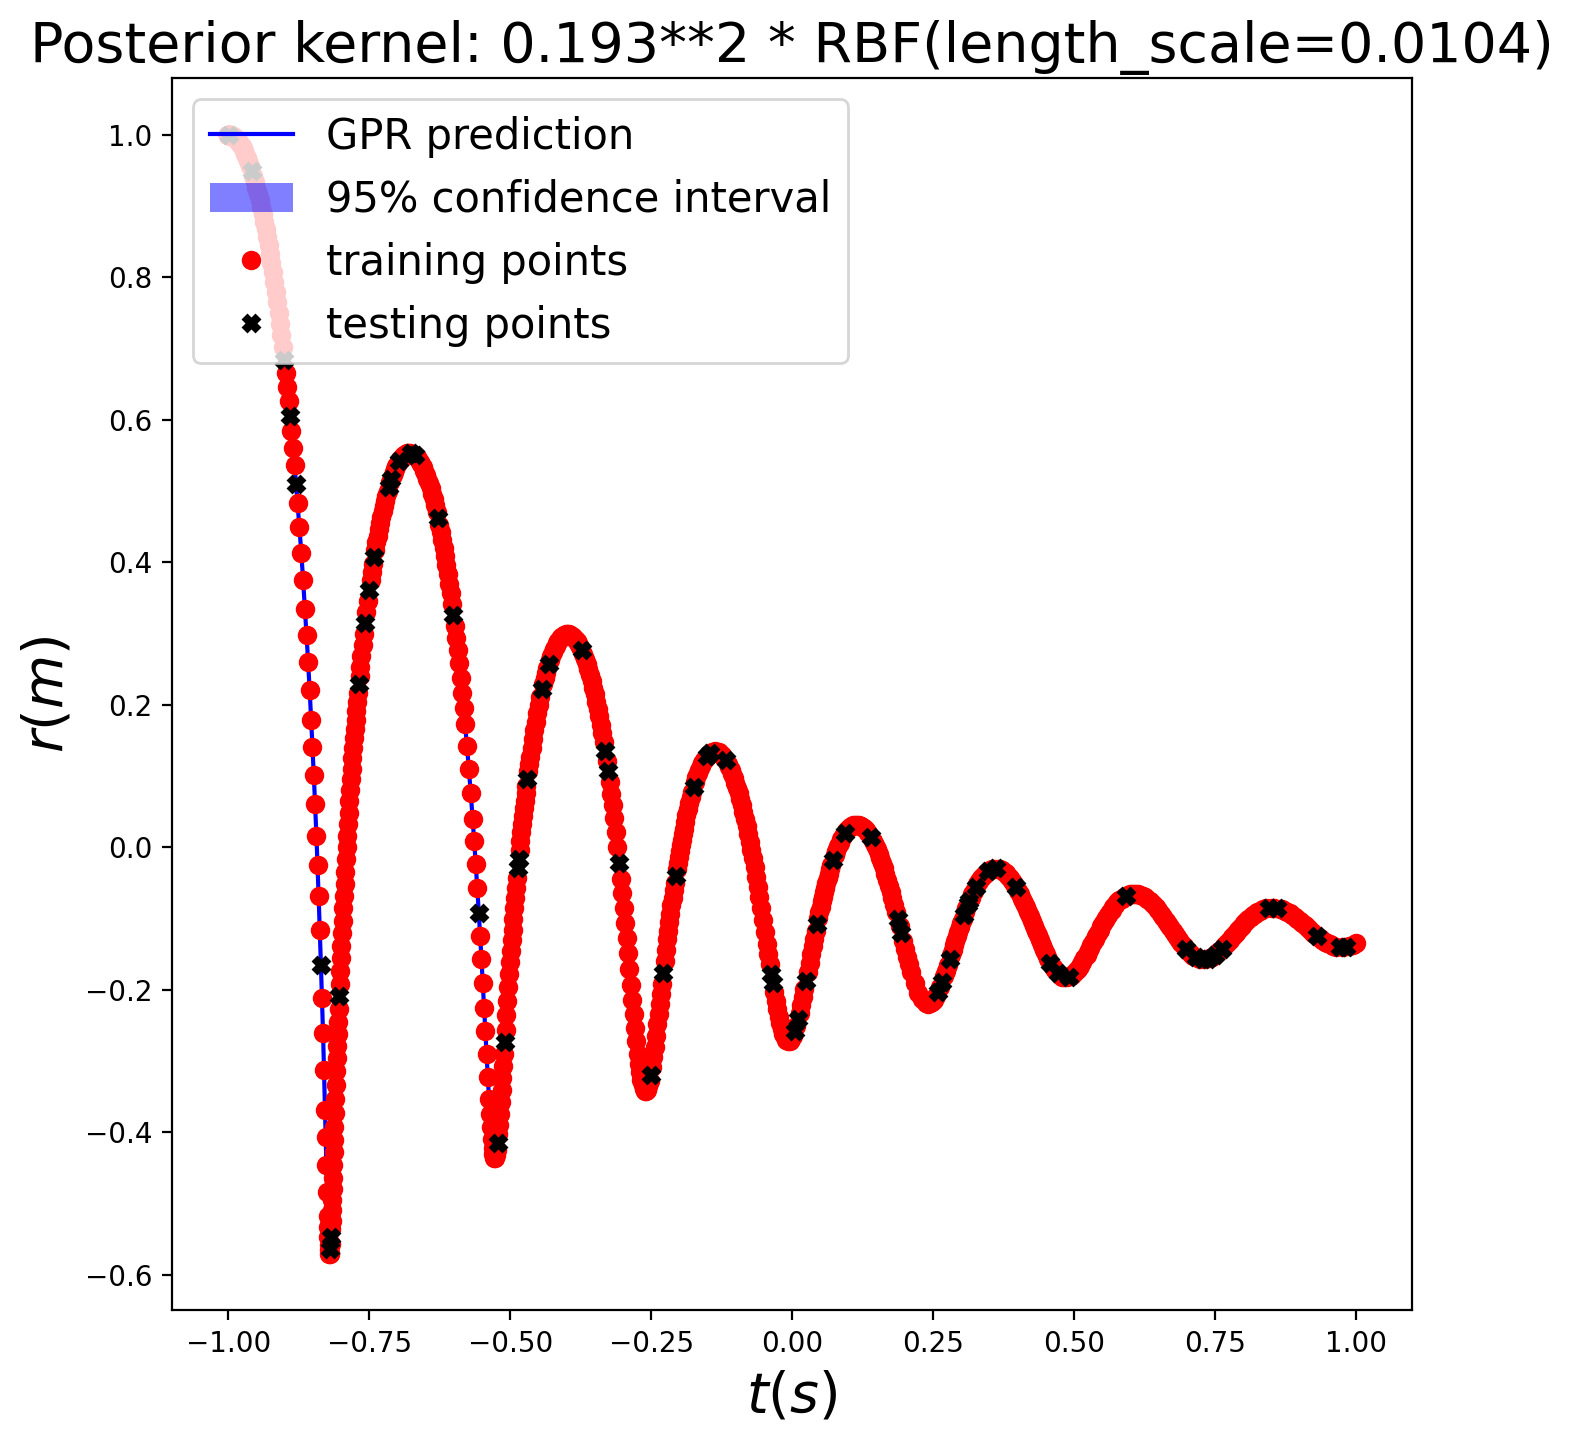

In [13]:
fig2

<c id='Training with Different Kernels: ExpSineSquared with an optimizer fmin_1_bfgs_b'></c>

### Training with Different Kernels: ExpSineSquared with an optimizer fmin_1_bfgs_b

In [14]:
# Define the kernel function
kernel = ExpSineSquared(length_scale=3.0, periodicity=3.14,
                        length_scale_bounds=(0.1, 10.0),
                        periodicity_bounds=(0.1, 10)) * RBF(3.0, (1e-2, 1e2))

gp_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=20)
#gp_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-10, optimizer=None, n_restarts_optimizer=20)

# Fit to data to determine parameters
gp_model.fit(X_train, y_train)

# Make the prediction on the entire dataset (for plotting)
y_plot_pred, sigma_plot = gp_model.predict(X_plot, return_std=True) # also output the uncertainty (std)

# Predict for test set (for error metric)
y_pred, sigma = gp_model.predict(X_test, return_std=True) # also output the uncertainty (std)

/oscar/home/mcarcana/3dasm_project/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/oscar/home/mcarcana/3dasm_project/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__periodicity is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


In [15]:
# Plot the prediction and the 95% confidence interval
fig1, ax1 = plt.subplots()

ax1.plot(x_plot, y_plot_pred, 'b-', label="GPR prediction")
ax1.fill(np.concatenate([x_plot, x_plot[::-1]]),
         np.concatenate([y_plot_pred - 1.9600 * sigma_plot,
                        (y_plot_pred + 1.9600 * sigma_plot)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

#ax1.plot(x_train, y_train, 'ro', markersize=6, label="training points") # noiseless data
#ax1.plot(x_test, y_test, 'kX', markersize=6, label="testing points") # Plot test points

ax1.set_xlabel('$t (s)$', fontsize=20)
ax1.set_ylabel('$r (m)$', fontsize=20)
ax1.set_title("Posterior kernel: %s"
              % gp_model.kernel_, fontsize=20) # Show in the title the value of the hyperparameters
#ax1.set_ylim(-10, 15) # just to provide more space for the legend
ax1.legend(loc='upper left', fontsize=15)
fig1.set_size_inches(8,8)
plt.close(fig1) # close the plot to see it in next cell

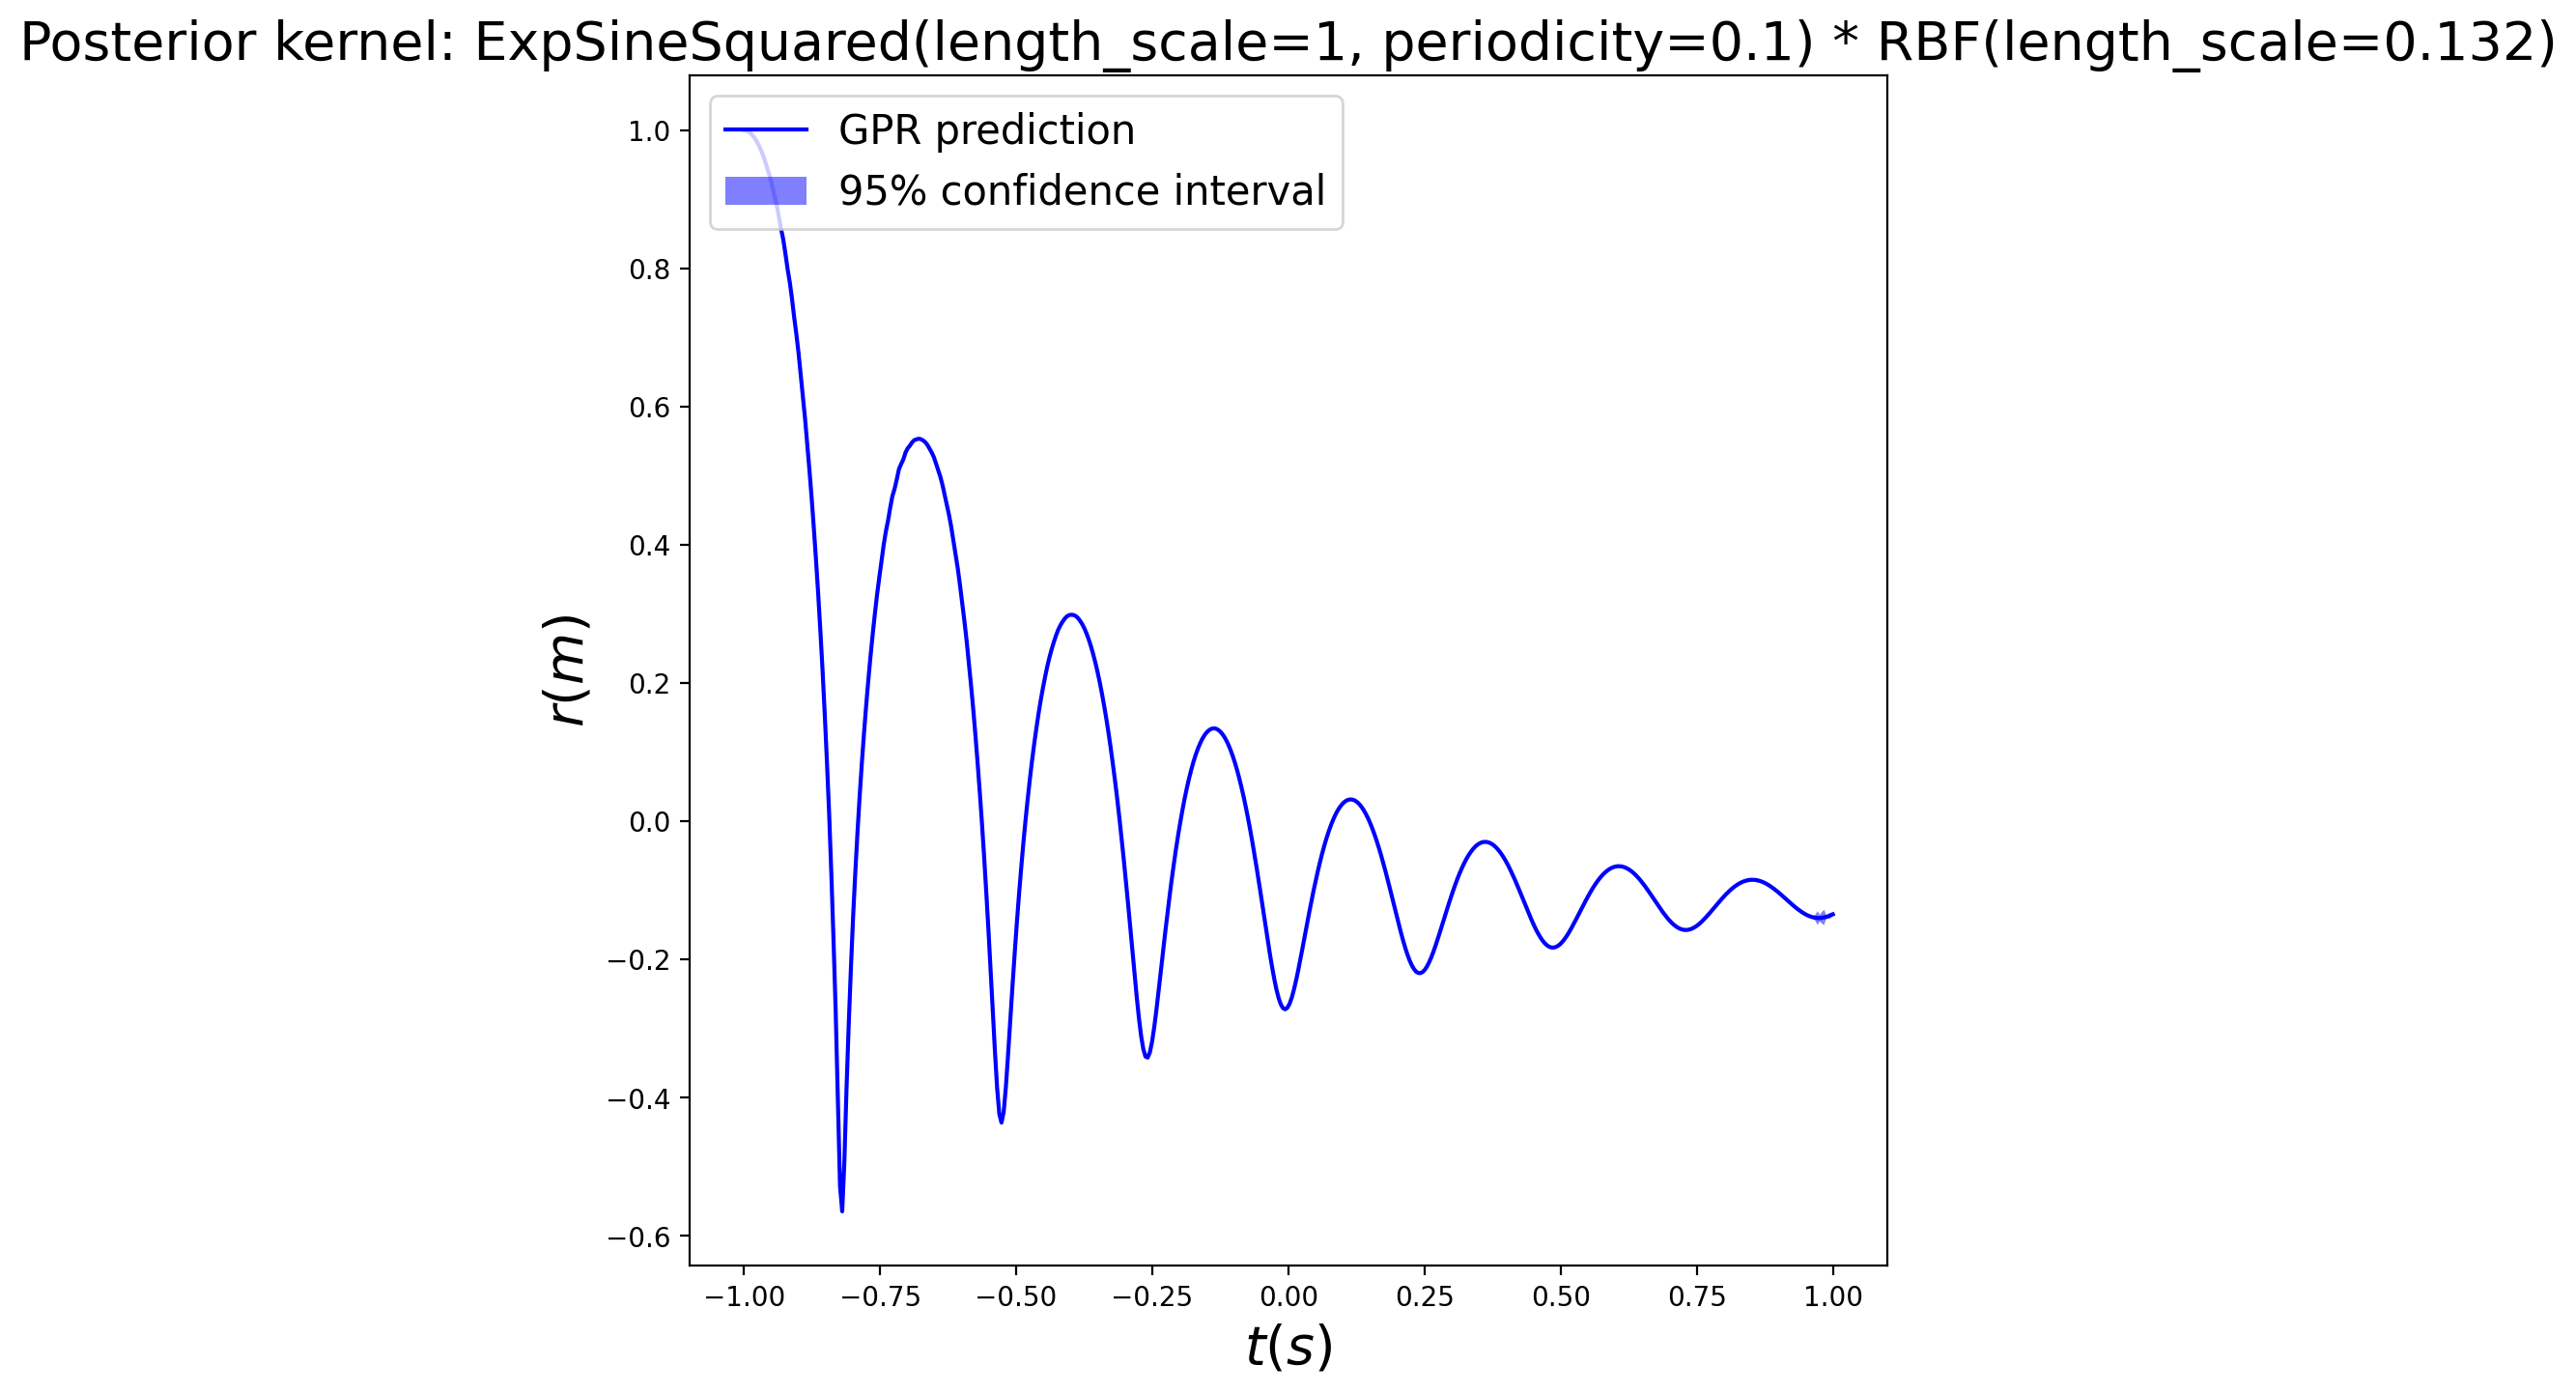

In [16]:
fig1

In [17]:
# Plot the function, the prediction and the 95% confidence interval
fig2, ax2 = plt.subplots()

ax2.plot(x_plot, y_plot_pred, 'b-', label="GPR prediction")
ax2.fill(np.concatenate([x_plot, x_plot[::-1]]),
         np.concatenate([y_plot_pred - 1.9600 * sigma_plot,
                        (y_plot_pred + 1.9600 * sigma_plot)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

ax2.plot(x_train, y_train, 'ro', markersize=6, label="training points") # noiseless data
ax2.plot(x_test, y_test, 'kX', markersize=6, label="testing points") # Plot test points

ax2.set_xlabel('$x$', fontsize=20)
ax2.set_ylabel('$f(x)$', fontsize=20)
ax2.set_title("Posterior kernel: %s"
              % gp_model.kernel_, fontsize=20) # Show in the title the value of the hyperparameters
#ax2.set_ylim(-10, 15) # just to provide more space for the legend
ax2.legend(loc='upper left', fontsize=15)
fig2.set_size_inches(8,8)
plt.close(fig2) # close the plot to see it in next cell

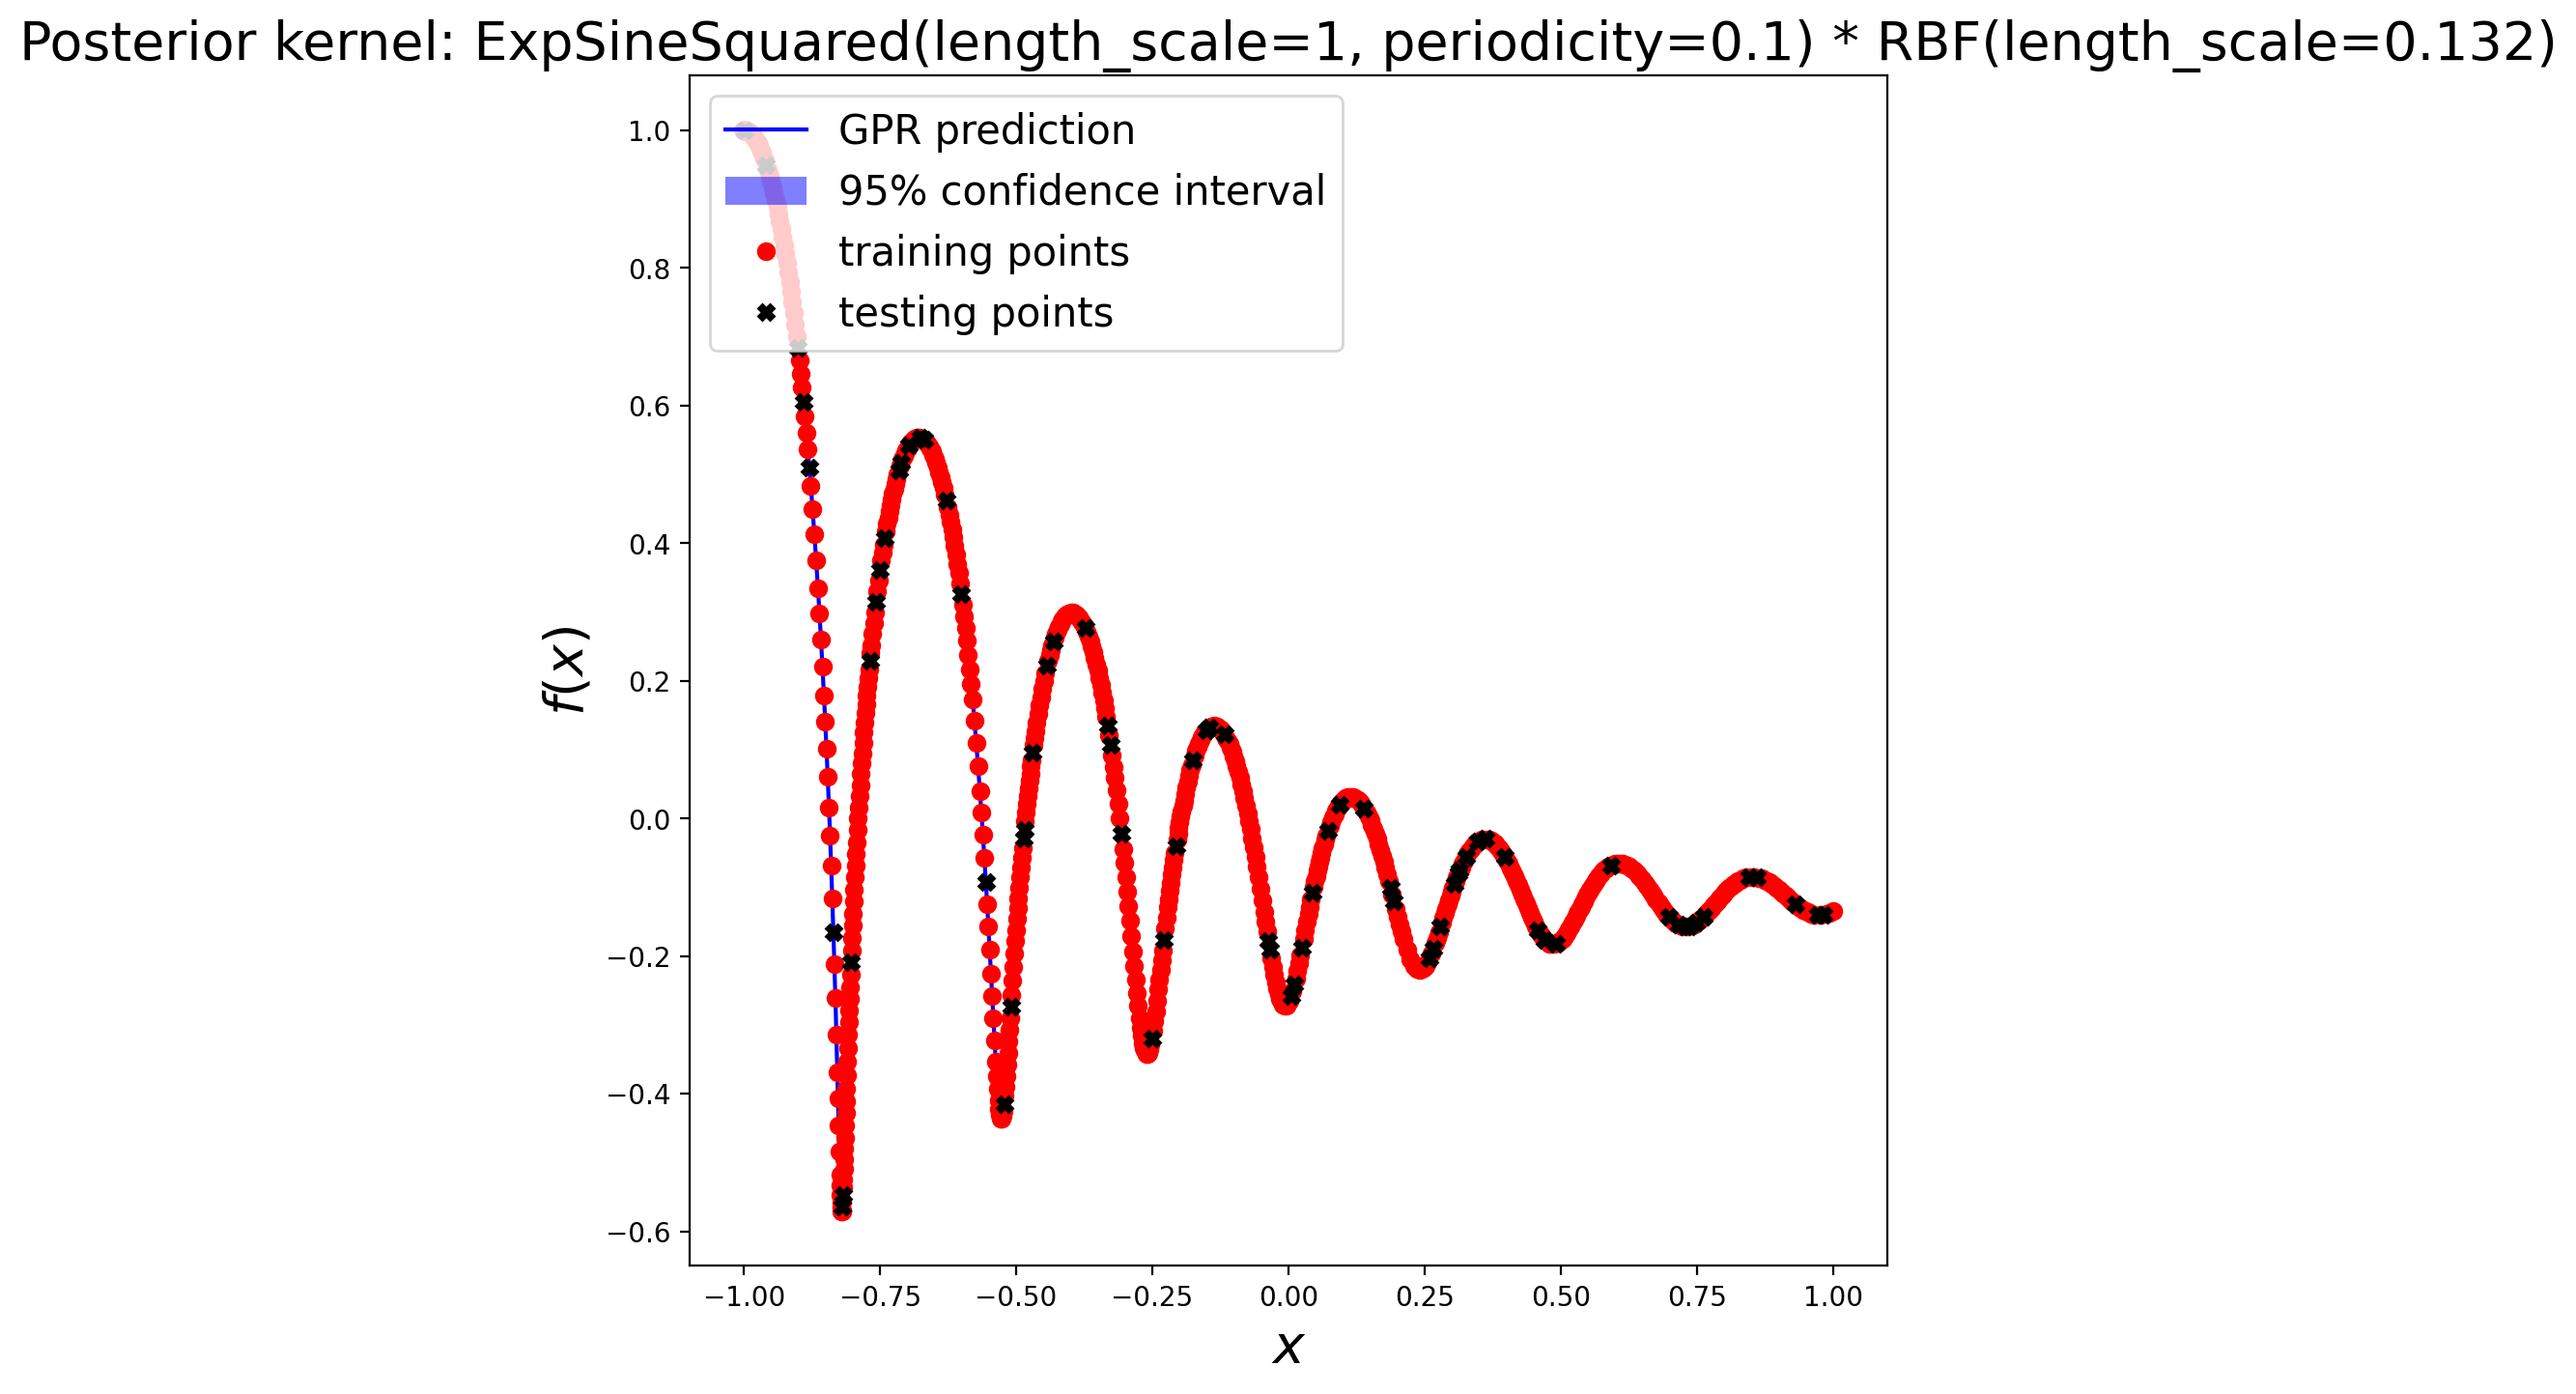

In [18]:
fig2

<d id='Training with Different Kernels: Matern with an optimizer fmin_1_bfgs_b'></d>

### Training with Different Kernels: Matern with an optimizer fmin_1_bfgs_b

In [19]:
# Define the kernel function
kernel = Matern(length_scale=1.0, length_scale_bounds=(1e-2, 1e2),nu=1.5)

gp_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=20)
#gp_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-10, optimizer=None, n_restarts_optimizer=20)

# Fit to data to determine parameters
gp_model.fit(X_train, y_train)

# Make the prediction on the entire dataset (for plotting)
y_plot_pred, sigma_plot = gp_model.predict(X_plot, return_std=True) # also output the uncertainty (std)

# Predict for test set (for error metric)
y_pred, sigma = gp_model.predict(X_test, return_std=True) # also output the uncertainty (std)

In [20]:
# Plot the prediction and the 95% confidence interval
fig1, ax1 = plt.subplots()

ax1.plot(x_plot, y_plot_pred, 'b-', label="GPR prediction")
ax1.fill(np.concatenate([x_plot, x_plot[::-1]]),
         np.concatenate([y_plot_pred - 1.9600 * sigma_plot,
                        (y_plot_pred + 1.9600 * sigma_plot)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

ax1.set_xlabel('$t (s)$', fontsize=20)
ax1.set_ylabel('$r (m)$', fontsize=20)
ax1.set_title("Posterior kernel: %s"
              % gp_model.kernel_, fontsize=20) # Show in the title the value of the hyperparameters
ax1.legend(loc='upper left', fontsize=15)
fig1.set_size_inches(8,8)
plt.close(fig1) # close the plot to see it in next cell

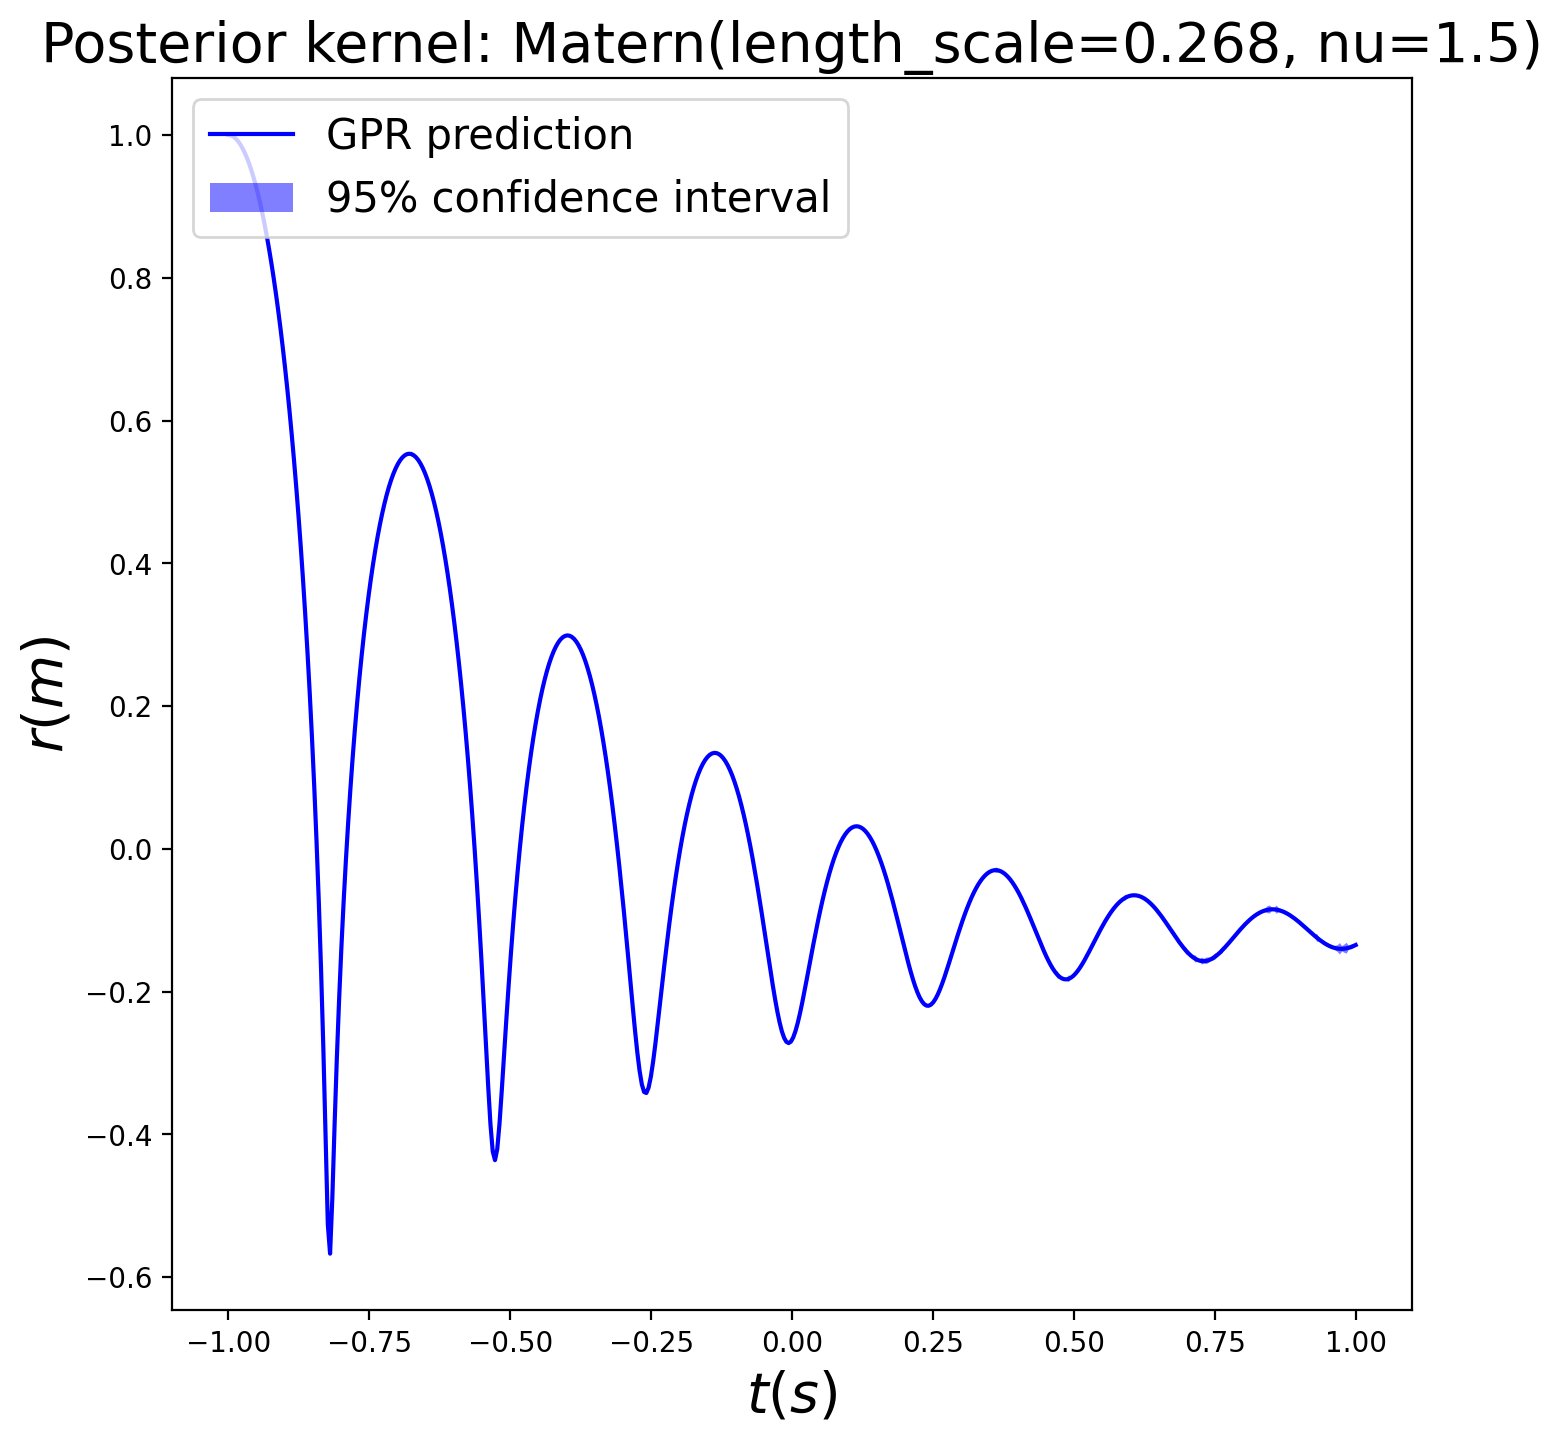

In [21]:
fig1

In [22]:
# Plot the function, prediction and the 95% confidence interval
fig2, ax2 = plt.subplots()

ax2.plot(x_plot, y_plot_pred, 'b-', label="GPR prediction")
ax2.fill(np.concatenate([x_plot, x_plot[::-1]]),
         np.concatenate([y_plot_pred - 1.9600 * sigma_plot,
                        (y_plot_pred + 1.9600 * sigma_plot)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

ax2.plot(x_train, y_train, 'ro', markersize=6, label="training points") # noiseless data
ax2.plot(x_test, y_test, 'kX', markersize=6, label="testing points") # Plot test points

ax2.set_xlabel('$t (s)$', fontsize=20)
ax2.set_ylabel('$r (m)$', fontsize=20)
ax2.set_title("Posterior kernel: %s"
              % gp_model.kernel_, fontsize=20) # Show in the title the value of the hyperparameters
ax2.legend(loc='upper left', fontsize=15)
fig2.set_size_inches(8,8)
plt.close(fig2) # close the plot to see it in next cell

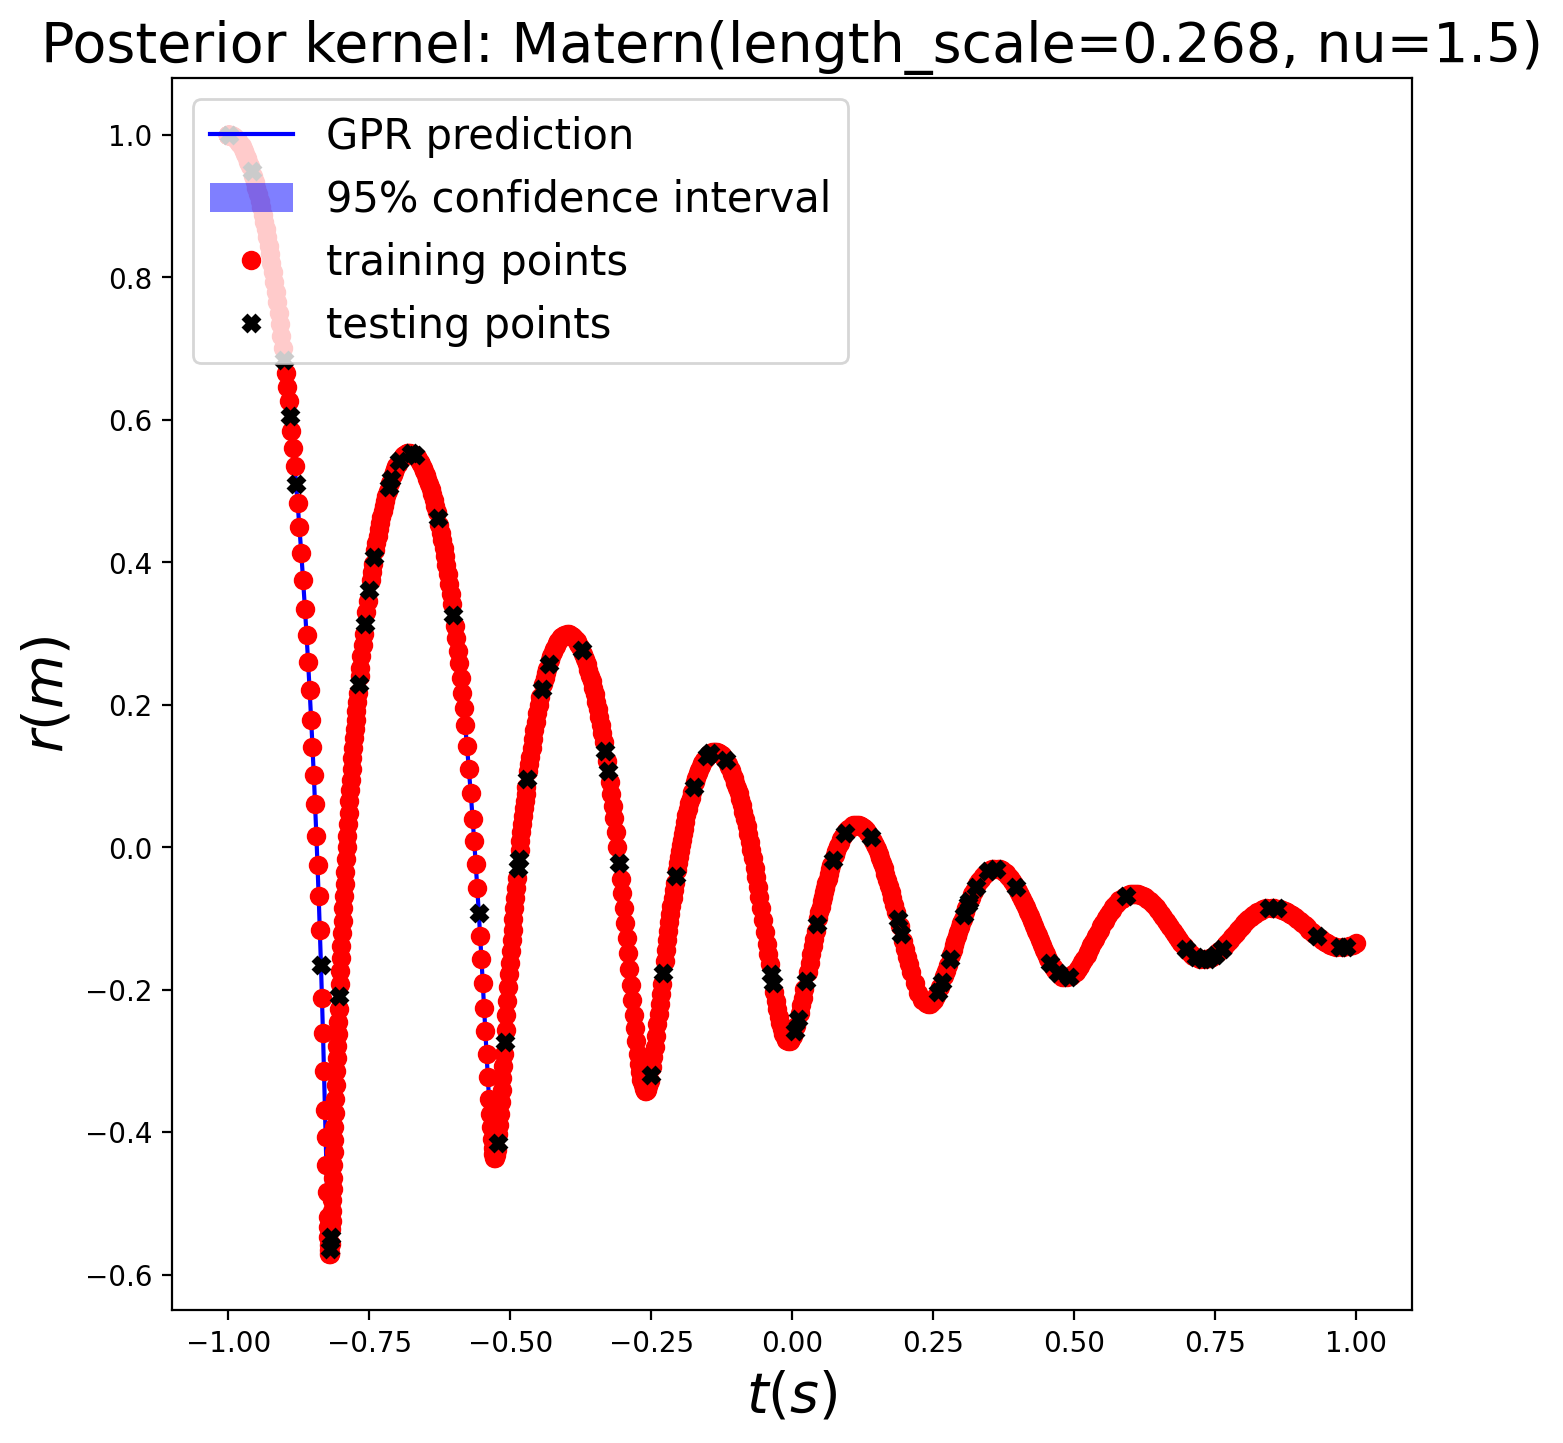

In [23]:
fig2

<e id='Training with Different Kernels: common Constant*RBF kernel With No Optimizer'></e>

### Training with Different Kernels: common Constant*RBF kernel With No Optimizer

In [24]:
# Define the kernel function
kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)) # This is the very common Constant*RBF kernel

gp_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, optimizer=None, n_restarts_optimizer=20)

# Fit to data to determine parameters
gp_model.fit(X_train, y_train)

# Make the prediction on the entire dataset (for plotting)
y_plot_pred, sigma_plot = gp_model.predict(X_plot, return_std=True) # also output the uncertainty (std)

# Predict for test set (for error metric)
y_pred, sigma = gp_model.predict(X_test, return_std=True) # also output the uncertainty (std)

In [25]:
# Plot the prediction and the 95% confidence interval
fig1, ax1 = plt.subplots()

ax1.plot(x_plot, y_plot_pred, 'b-', label="GPR prediction")
ax1.fill(np.concatenate([x_plot, x_plot[::-1]]),
         np.concatenate([y_plot_pred - 1.9600 * sigma_plot,
                        (y_plot_pred + 1.9600 * sigma_plot)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

ax1.set_xlabel('$t (s)$', fontsize=20)
ax1.set_ylabel('$r (m)$', fontsize=20)
ax1.set_title("Posterior kernel: %s"
              % gp_model.kernel_, fontsize=20) # Show in the title the value of the hyperparameters
ax1.legend(loc='upper left', fontsize=15)
fig1.set_size_inches(8,8)
plt.close(fig1) # close the plot to see it in next cell

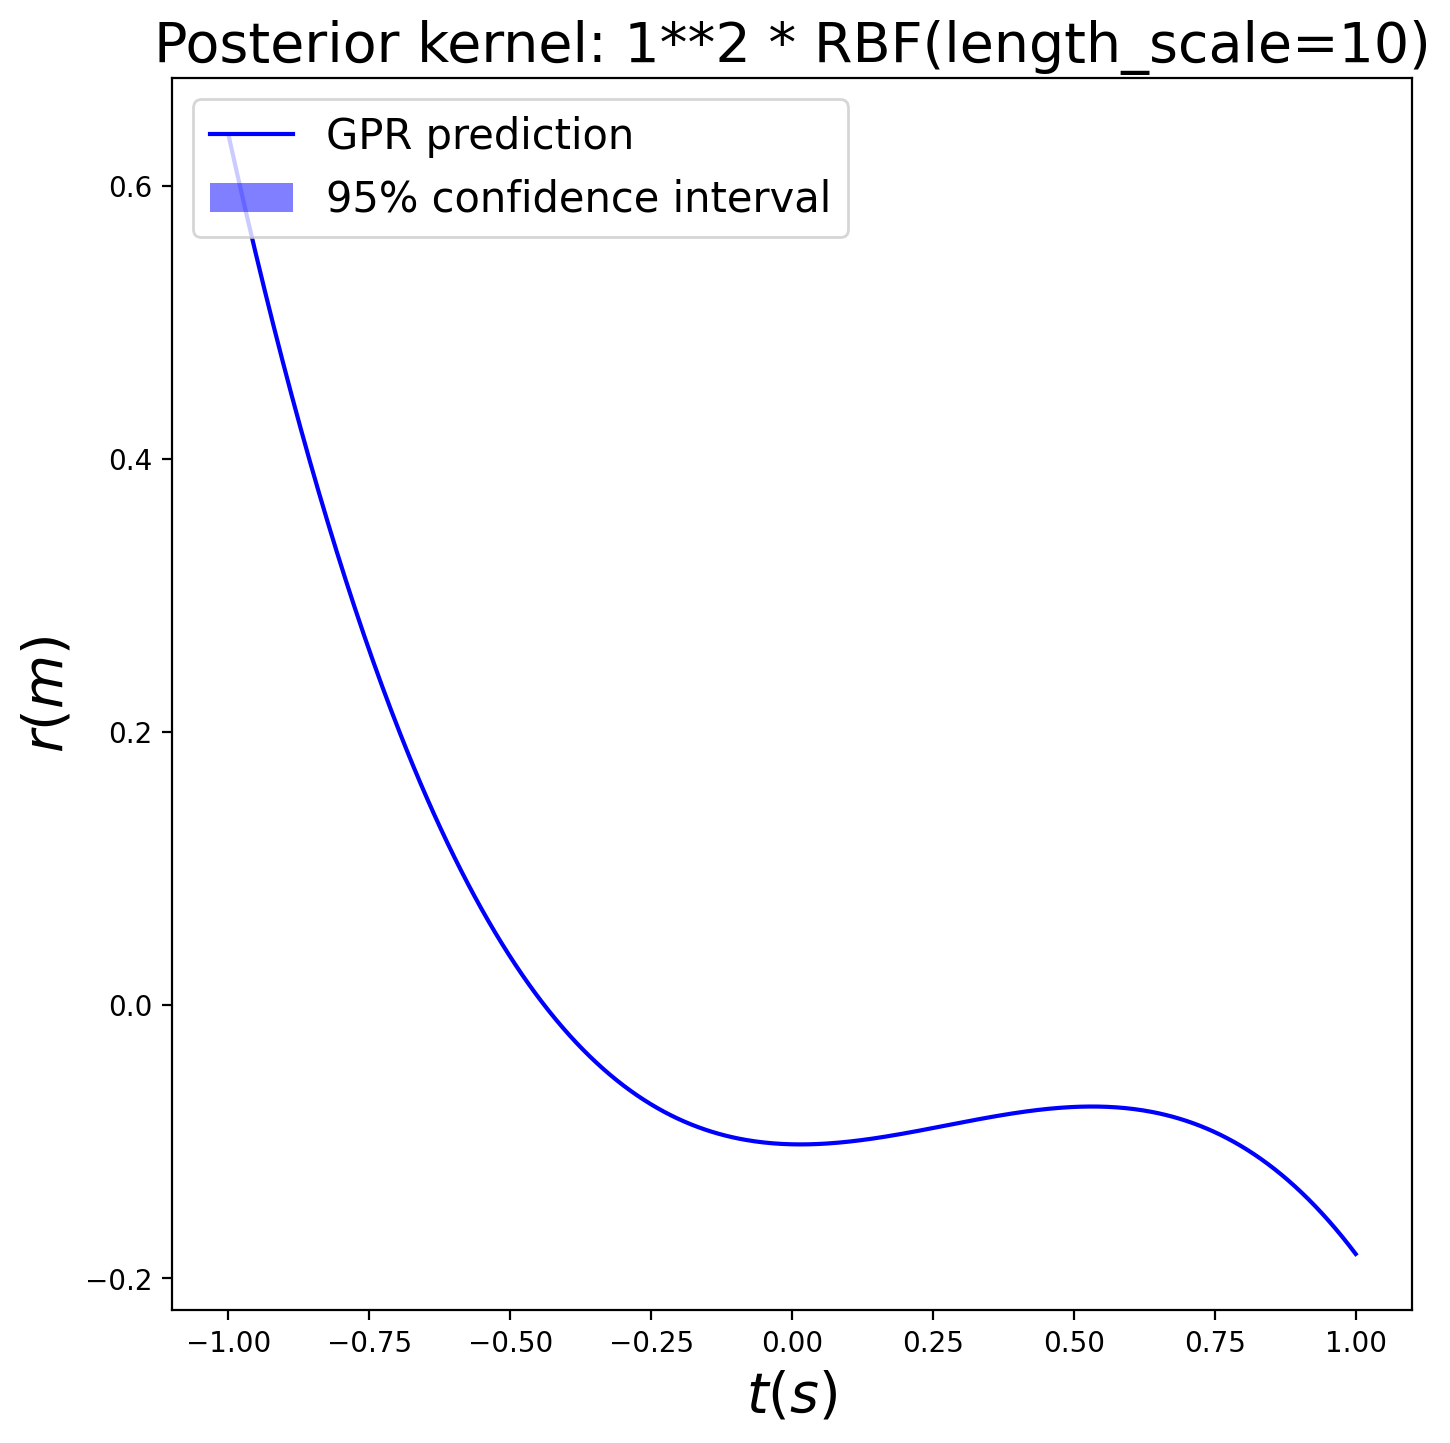

In [26]:
fig1

<f id='Training with Different Kernels: ExpSineSquared with no optimizer'></f>

### Training with Different Kernels: ExpSineSquared with no optimizer

In [27]:
# Define the kernel function
kernel = ExpSineSquared(length_scale=3.0, periodicity=3.14,
                        length_scale_bounds=(0.1, 10.0),
                        periodicity_bounds=(0.1, 10)) * RBF(3.0, (1e-2, 1e2))

gp_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, optimizer=None, n_restarts_optimizer=20)

# Fit to data to determine parameters
gp_model.fit(X_train, y_train)

# Make the prediction on the entire dataset (for plotting)
y_plot_pred, sigma_plot = gp_model.predict(X_plot, return_std=True) # also output the uncertainty (std)

# Predict for test set (for error metric)
y_pred, sigma = gp_model.predict(X_test, return_std=True) # also output the uncertainty (std)

In [28]:
# Plot the prediction and the 95% confidence interval
fig1, ax1 = plt.subplots()

ax1.plot(x_plot, y_plot_pred, 'b-', label="GPR prediction")
ax1.fill(np.concatenate([x_plot, x_plot[::-1]]),
         np.concatenate([y_plot_pred - 1.9600 * sigma_plot,
                        (y_plot_pred + 1.9600 * sigma_plot)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

ax1.set_xlabel('$t (s)$', fontsize=20)
ax1.set_ylabel('$r (m)$', fontsize=20)
ax1.set_title("Posterior kernel: %s"
              % gp_model.kernel_, fontsize=20) # Show in the title the value of the hyperparameters
ax1.legend(loc='upper left', fontsize=15)
fig1.set_size_inches(8,8)
plt.close(fig1) # close the plot to see it in next cell

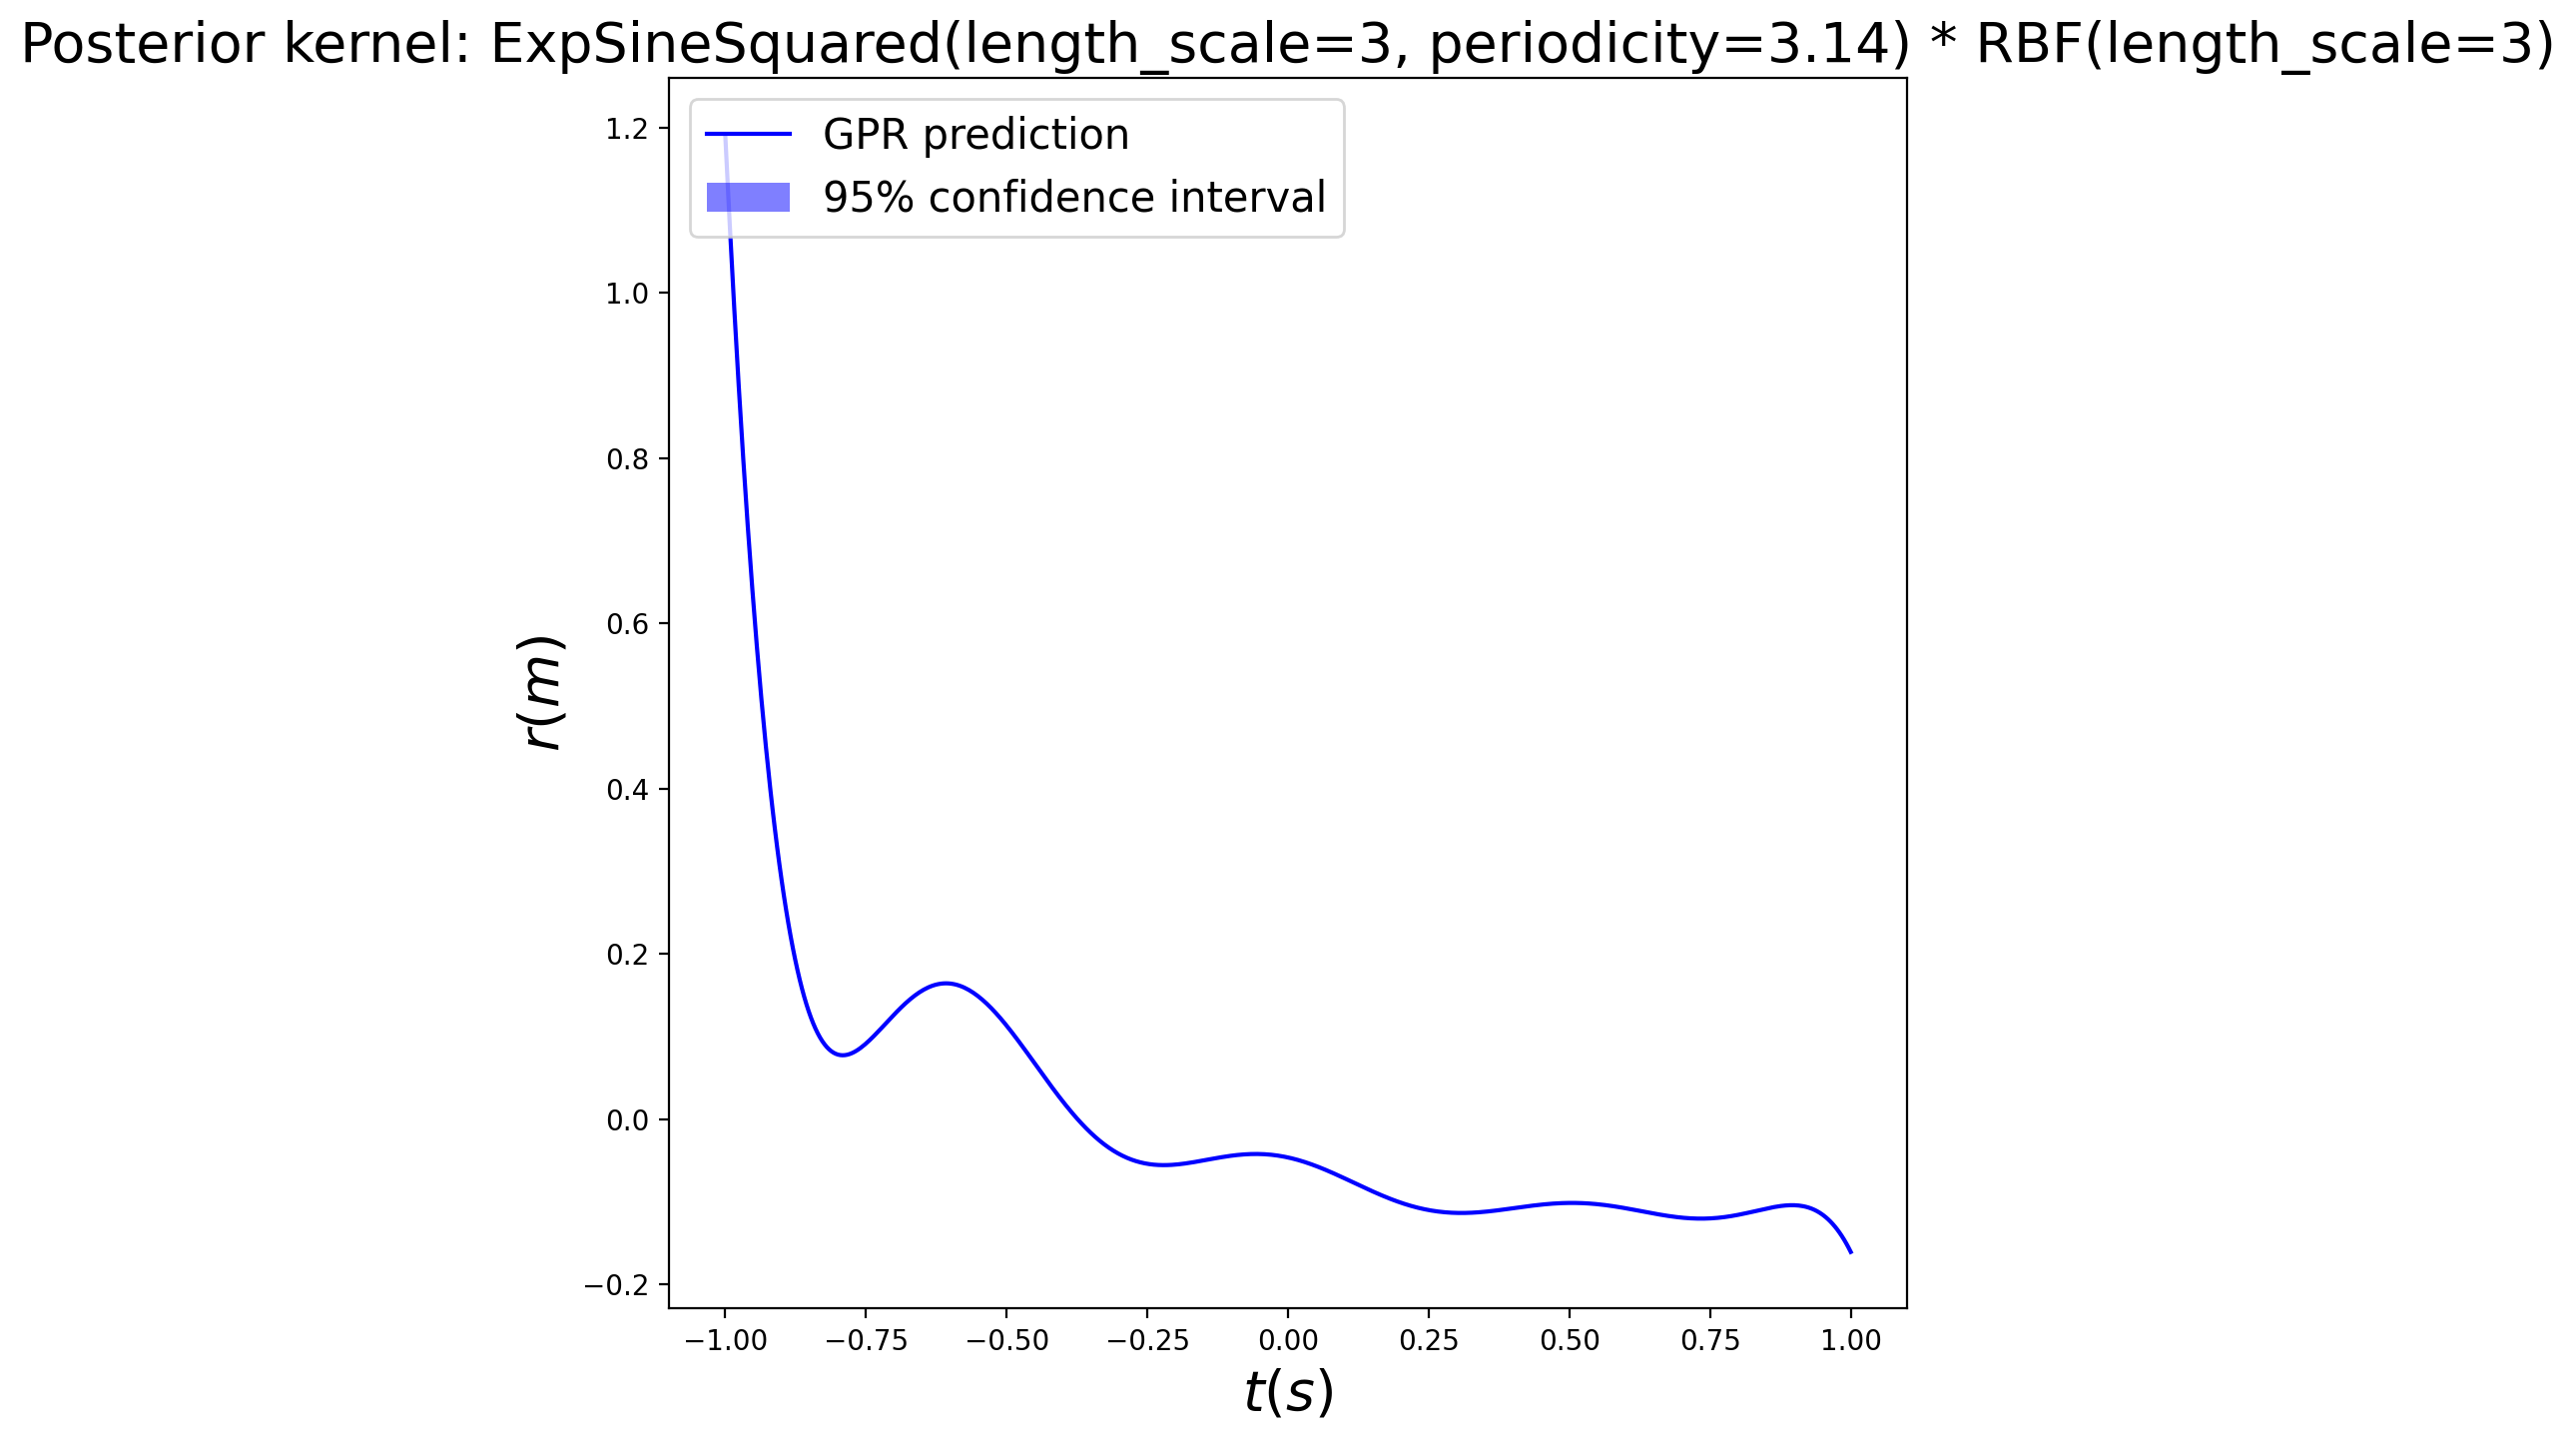

In [29]:
fig1

<g id='Training with Different Kernels: Matern with no optimizer'></g>

### Training with Different Kernels: Matern with no optimizer

In [30]:
# Define the kernel function
kernel = Matern(length_scale=1.0, length_scale_bounds=(1e-2, 1e2),nu=1.5)

gp_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, optimizer=None, n_restarts_optimizer=20)

# Fit to data to determine parameters
gp_model.fit(X_train, y_train)

# Make the prediction on the entire dataset (for plotting)
y_plot_pred, sigma_plot = gp_model.predict(X_plot, return_std=True) # also output the uncertainty (std)

# Predict for test set (for error metric)
y_pred, sigma = gp_model.predict(X_test, return_std=True) # also output the uncertainty (std)

In [31]:
# Plot the prediction and the 95% confidence interval
fig1, ax1 = plt.subplots()

ax1.plot(x_plot, y_plot_pred, 'b-', label="GPR prediction")
ax1.fill(np.concatenate([x_plot, x_plot[::-1]]),
         np.concatenate([y_plot_pred - 1.9600 * sigma_plot,
                        (y_plot_pred + 1.9600 * sigma_plot)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

ax1.set_xlabel('$t (s)$', fontsize=20)
ax1.set_ylabel('$r (m)$', fontsize=20)
ax1.set_title("Posterior kernel: %s"
              % gp_model.kernel_, fontsize=20) # Show in the title the value of the hyperparameters
ax1.legend(loc='upper left', fontsize=15)
fig1.set_size_inches(8,8)
plt.close(fig1) # close the plot to see it in next cell

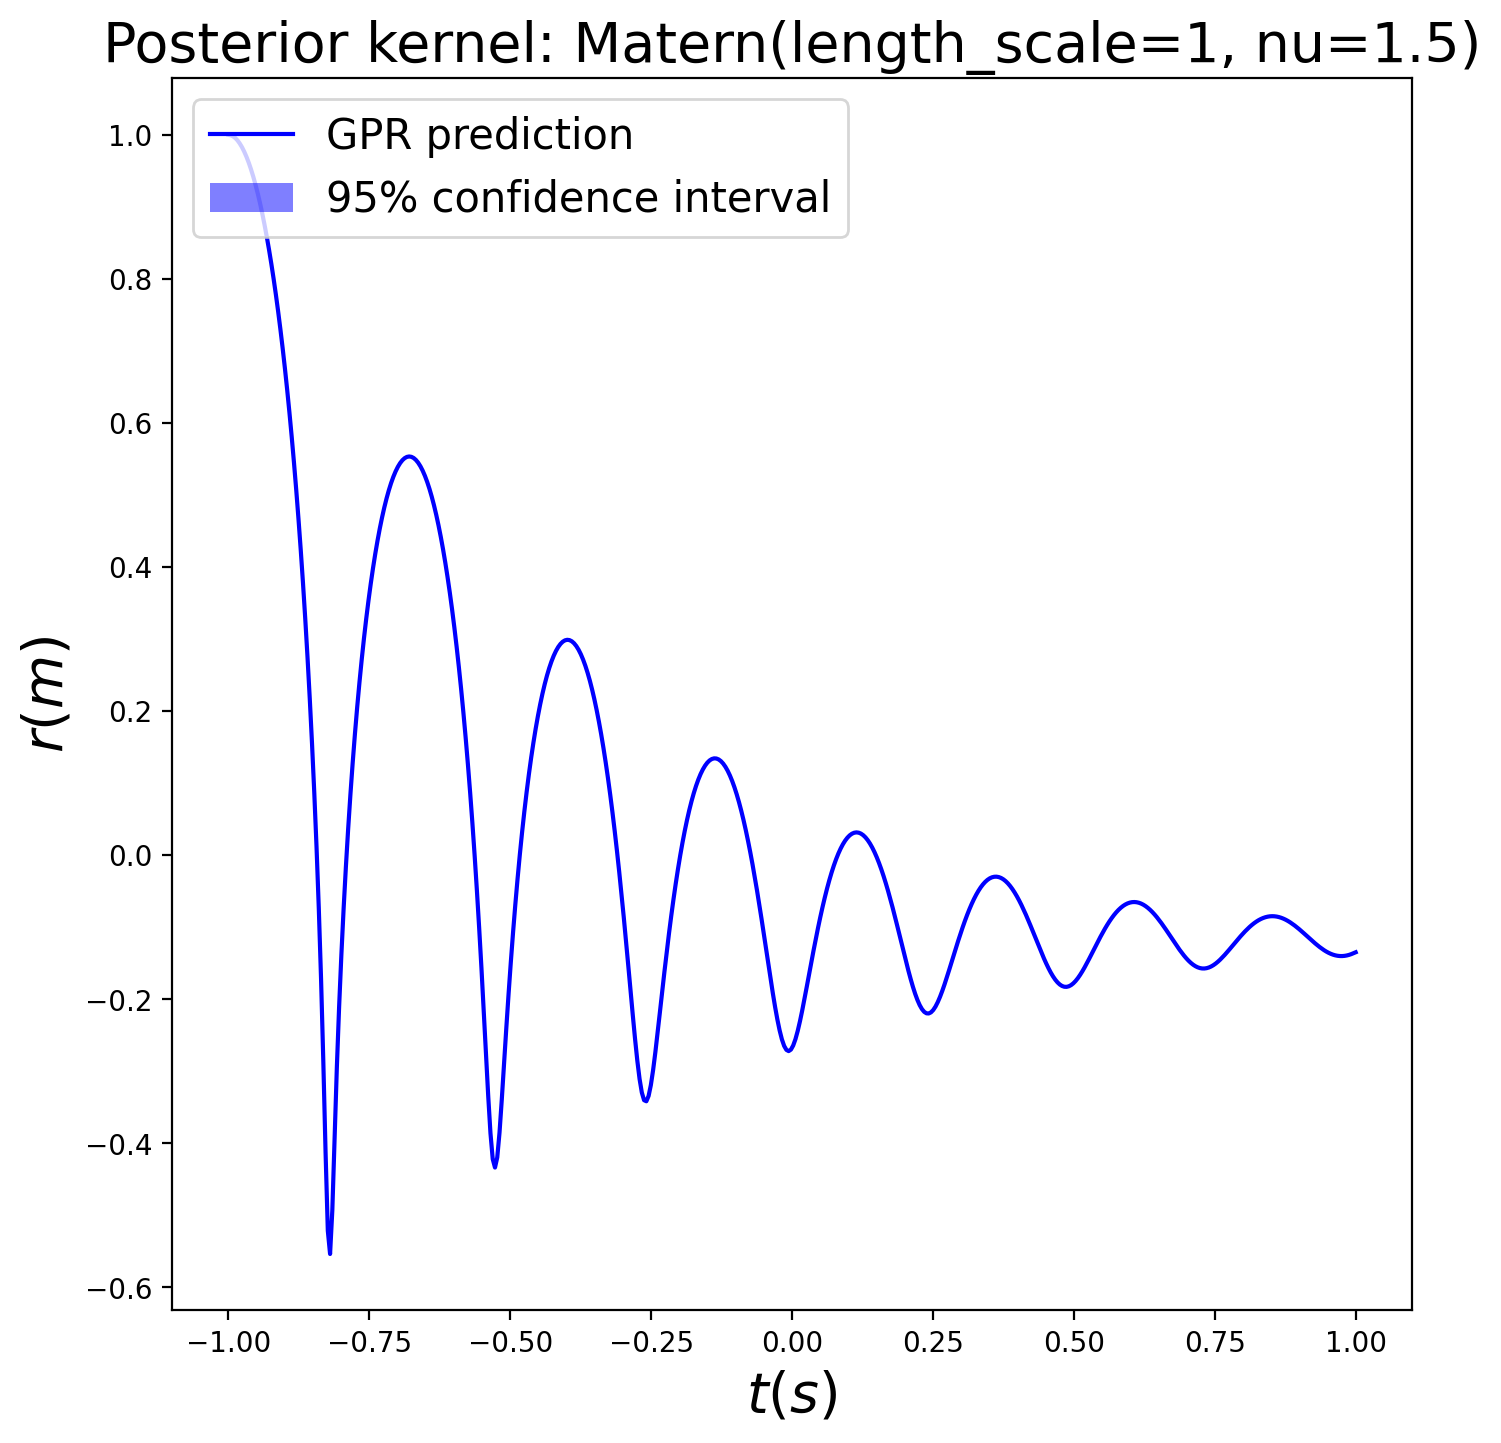

In [32]:
fig1

### different optimizers? different ratios of training/testing data?

<h id='Phase 1.5: Gaussian Process on Experimental Data Only'></h>

# Phase 1.5: Gaussian Process on Experimental Data Only

In [38]:
exp_df = pd.read_csv("../3dasm_data/exp_data/PolyAcry_12_28_04.txt") # read pandas DataFrame
print("Show the experimental DataFrame used for testing data:\n", exp_df)

FileNotFoundError: [Errno 2] No such file or directory: '../3dasm_data/exp_data/PolyAcry_12_28_04.txt'

In [ ]:
Data_t_exp = exp_df.iloc[:,0]
Data_R1_exp = exp_df.iloc[:,1] 
Data_R2_exp = exp_df.iloc[:,2] 
print("Experimental x data is time:\n",Data_t_exp)
print("Experimental Bubble Radius from camera one is:\n",Data_R1_exp)
print("Experimental Bubble Radius from camera two is:\n",Data_R2_exp)

In [ ]:
fig_exp_data, ax_exp_data = plt.subplots() # create a plot
R1_line = ax_exp_data.plot(Data_t_exp, Data_R1_exp, 'b.', label='R1 of camera one at 0 degrees')
R2_line = ax_exp_data.plot(Data_t_exp, Data_R2_exp, 'r.',label='R2 of camera two at 90 degrees')
ax_exp_data.set_xlabel("t (s)", fontsize=20) # create x-axis label with font size 20
ax_exp_data.set_ylabel("r (m)", fontsize=20) # create y-axis label with font size 20
ax_exp_data.set_title("Experimental Bubble Radius vs Time", fontsize=20); # create title with font size 20

handles, labels = ax_exp_data.get_legend_handles_labels()
ax_exp_data.legend(handles, labels)
plt.show(fig_exp_data)

In [ ]:
n_data = len(Data_t_exp) # number of points in our dataset
testset_ratio = 0.75 # ratio of test set points from the dataset

t_data = np.reshape(Data_t_exp,(-1,1)) # a 2D array that scikit-learn likes

seed = 1987 # set a random seed so that everyone gets the same result
np.random.seed(seed)

# Let's split into 10% training points and the rest for testing:
X_train, X_test, y_train, y_test = train_test_split(t_data,
                                    Data_R1_exp, test_size=testset_ratio,
                                    random_state=seed)

x_train = X_train.ravel() # just for plotting later
x_test = X_test.ravel() # just for plotting later

print("Here's a print of X_train:\n", X_train)

In [ ]:
n_exp_max = np.max(t_data)
print(n_exp_max)

# Define points used for plotting
n_plot = 500 # number of points used for plotting the model
n_max = np.max(t_data)
x_exp_plot = np.linspace(0, n_exp_max, n_plot) # create dataset with uniformly spaced points
X_exp_plot = np.reshape(x_exp_plot,(-1,1)) # a 2D array that scikit-learn likes

<i id='Training with Different kernels: common Constant*RBF kernel with an optimizer fmin_1_bfgs_b'></i>

## Training with Different kernels: common Constant*RBF kernel with an optimizer fmin_1_bfgs_b

In [ ]:
# Define the kernel function
kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)) # This is the very common Constant*RBF kernel

gp_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-2, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=20)
#gp_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-10, optimizer=None, n_restarts_optimizer=20)

# Fit to data to determine parameters
gp_model.fit(X_train, y_train)

# Make the prediction on the entire dataset (for plotting)
y_plot_pred, sigma_plot = gp_model.predict(X_exp_plot, return_std=True) # also output the uncertainty (std)

# Predict for test set (for error metric)
y_pred, sigma = gp_model.predict(X_test, return_std=True) # also output the uncertainty (std)

In [ ]:
# Plot the prediction and the 95% confidence interval
fig1, ax1 = plt.subplots()

ax1.plot(x_exp_plot, y_plot_pred, 'b-', label="GPR prediction")
ax1.fill(np.concatenate([x_exp_plot, x_exp_plot[::-1]]),
         np.concatenate([y_plot_pred - 1.9600 * sigma_plot,
                        (y_plot_pred + 1.9600 * sigma_plot)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

ax1.plot(x_train, y_train, 'ro', markersize=6, label="training points") # noiseless data
ax1.plot(x_test, y_test, 'kX', markersize=6, label="testing points") # Plot test points

ax1.set_xlabel('$t (s)$', fontsize=20)
ax1.set_ylabel('$r (m)$', fontsize=20)
ax1.set_title("Posterior kernel: %s"
              % gp_model.kernel_, fontsize=20) # Show in the title the value of the hyperparameters
ax1.legend(loc='upper left', fontsize=15)
fig1.set_size_inches(8,8)
plt.close(fig1) # close the plot to see it in next cell

In [ ]:
fig1

<j id='Training with Different Kernels: ExpSineSquared with an optimizer fmin_1_bfgs_b'></j>

### Training with Different Kernels: ExpSineSquared with an optimizer fmin_1_bfgs_b

In [ ]:
# Define the kernel function
kernel = ExpSineSquared(length_scale=3.0, periodicity=3.14,
                        length_scale_bounds=(0.1, 10.0),
                        periodicity_bounds=(0.1, 10)) * RBF(3.0, (1e-2, 1e2))

gp_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=20)
#gp_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-10, optimizer=None, n_restarts_optimizer=20)

# Fit to data to determine parameters
gp_model.fit(X_train, y_train)

# Make the prediction on the entire dataset (for plotting)
y_plot_pred, sigma_plot = gp_model.predict(X_exp_plot, return_std=True) # also output the uncertainty (std)

# Predict for test set (for error metric)
y_pred, sigma = gp_model.predict(X_test, return_std=True) # also output the uncertainty (std)

In [ ]:
# Plot the prediction and the 95% confidence interval
fig1, ax1 = plt.subplots()

ax1.plot(x_exp_plot, y_plot_pred, 'b-', label="GPR prediction")
ax1.fill(np.concatenate([x_exp_plot, x_exp_plot[::-1]]),
         np.concatenate([y_plot_pred - 1.9600 * sigma_plot,
                        (y_plot_pred + 1.9600 * sigma_plot)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

ax1.plot(x_train, y_train, 'ro', markersize=6, label="training points") # noiseless data
ax1.plot(x_test, y_test, 'kX', markersize=6, label="testing points") # Plot test points

ax1.set_xlabel('$t (s)$', fontsize=20)
ax1.set_ylabel('$r (m)$', fontsize=20)
ax1.set_title("Posterior kernel: %s"
              % gp_model.kernel_, fontsize=20) # Show in the title the value of the hyperparameters
ax1.legend(loc='upper left', fontsize=15)
fig1.set_size_inches(8,8)
plt.close(fig1) # close the plot to see it in next cell

In [ ]:
fig1

<k id='Training with Different Kernels: Matern with an optimizer fmin_1_bfgs_b'></k>

### Training with Different Kernels: Matern with an optimizer fmin_1_bfgs_b

In [ ]:
# Define the kernel function
kernel = Matern(length_scale=1.0, length_scale_bounds=(1e-2, 1e2),nu=1.5)

gp_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=20)
#gp_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, optimizer=None, n_restarts_optimizer=20)

# Fit to data to determine parameters
gp_model.fit(X_train, y_train)

# Make the prediction on the entire dataset (for plotting)
y_plot_pred, sigma_plot = gp_model.predict(X_exp_plot, return_std=True) # also output the uncertainty (std)

# Predict for test set (for error metric)
y_pred, sigma = gp_model.predict(X_test, return_std=True) # also output the uncertainty (std)

In [ ]:
# Plot the prediction and the 95% confidence interval
fig1, ax1 = plt.subplots()

ax1.plot(x_exp_plot, y_plot_pred, 'b-', label="GPR prediction")
ax1.fill(np.concatenate([x_exp_plot, x_exp_plot[::-1]]),
         np.concatenate([y_plot_pred - 1.9600 * sigma_plot,
                        (y_plot_pred + 1.9600 * sigma_plot)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

ax1.plot(x_train, y_train, 'ro', markersize=6, label="training points") # noiseless data
ax1.plot(x_test, y_test, 'kX', markersize=6, label="testing points") # Plot test points

ax1.set_xlabel('$t (s)$', fontsize=20)
ax1.set_ylabel('$r (m)$', fontsize=20)
ax1.set_title("Posterior kernel: %s"
              % gp_model.kernel_, fontsize=20) # Show in the title the value of the hyperparameters
ax1.legend(loc='upper left', fontsize=15)
fig1.set_size_inches(8,8)
plt.close(fig1) # close the plot to see it in next cell

In [ ]:
fig1

## with no optimizer? or different optimizers?

<l id='Phase 2: Training with Simulation Data and Testing with Experimental Data'></l>

# Phase 2: Training with Simulation Data and Testing with Experimental Data
## running with Constant Kernel and  f_min optimizer, Matern kernel with no optimizer

In [ ]:
# training data = simulation data, test data = experimental data

# defining training data
X_train = X_data # a 2D array that scikit-learn likes, for simulated data
y_train = Data_y

# defining test data
X_test = t_data
y_test = Data_R1_exp
#y_train2 = Data_R2_exp

n_data = len(Data_t_exp) # number of points in our dataset
#testset_ratio = len(X_train)/len(Data_t_exp) # ratio of test set points from the datasets

x_train = X_train.ravel() # just for plotting later
x_test = X_test.ravel() # just for plotting later

print(len(X_train))
print(len(y_train))

print(len(X_test))
print(len(y_test))

<m id='Constant Kernel and  f_min optimizer'></m>

### Constant Kernel and  f_min optimizer

In [ ]:
# Define the kernel function
kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)) # This is the very common Constant*RBF kernel

gp_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=20)

# Fit to data to determine parameters
gp_model.fit(X_train, y_train)

# Make the prediction on the entire dataset (for plotting)
y_plot_pred, sigma_plot = gp_model.predict(X_plot, return_std=True) # also output the uncertainty (std)

# Predict for test set (for error metric)
y_pred, sigma = gp_model.predict(X_test, return_std=True) # also output the uncertainty (std)

In [ ]:
# Plot the prediction and the 95% confidence interval
fig1, ax1 = plt.subplots()

ax1.plot(x_exp_plot, y_plot_pred, 'b-', label="GPR prediction")
ax1.fill(np.concatenate([x_exp_plot, x_exp_plot[::-1]]),
         np.concatenate([y_plot_pred - 1.9600 * sigma_plot,
                        (y_plot_pred + 1.9600 * sigma_plot)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

ax1.set_xlabel('$t (s)$', fontsize=20)
ax1.set_ylabel('$r (m)$', fontsize=20)
ax1.set_title("Posterior kernel: %s"
              % gp_model.kernel_, fontsize=20) # Show in the title the value of the hyperparameters
ax1.legend(loc='upper left', fontsize=15)
fig1.set_size_inches(8,8)
plt.close(fig1) # close the plot to see it in next cell

In [ ]:
fig1

<n id='Matern kernel with no optimizer'></n>

### Matern kernel with no optimizer

In [ ]:
# Define the kernel function
kernel = Matern(length_scale=1.0, length_scale_bounds=(1e-2, 1e2),nu=1.5)

gp_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, optimizer=None, n_restarts_optimizer=20)

# Fit to data to determine parameters
gp_model.fit(X_train, y_train)

# Make the prediction on the entire dataset (for plotting)
y_plot_pred, sigma_plot = gp_model.predict(X_plot, return_std=True) # also output the uncertainty (std)

# Predict for test set (for error metric)
y_pred, sigma = gp_model.predict(X_test, return_std=True) # also output the uncertainty (std)

In [ ]:
# Plot the prediction and the 95% confidence interval
fig1, ax1 = plt.subplots()

ax1.plot(x_exp_plot, y_plot_pred, 'b-', label="GPR prediction")
ax1.fill(np.concatenate([x_exp_plot, x_exp_plot[::-1]]),
         np.concatenate([y_plot_pred - 1.9600 * sigma_plot,
                        (y_plot_pred + 1.9600 * sigma_plot)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

ax1.set_xlabel('$t (s)$', fontsize=20)
ax1.set_ylabel('$r (m)$', fontsize=20)
ax1.set_title("Posterior kernel: %s"
              % gp_model.kernel_, fontsize=20) # Show in the title the value of the hyperparameters
ax1.legend(loc='upper left', fontsize=15)
fig1.set_size_inches(8,8)
plt.close(fig1) # close the plot to see it in next cell

In [ ]:
fig1

<o id='Phase 3: Multi-fidelity Gaussian Process'></o>

# Phase 3: Multi-fidelity Gaussian Process

# Phase 3: GPyTorch Regression for Experimental and Simulated Bubble Dynamics

In [ ]:
import math
import torch
import gpytorch
from matplotlib import pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
# Setting up Training and Testing Data
train_x = torch.Tensor(x_train)
train_y = torch.Tensor(y_train)

# Stack the time tensor vertically to create a 2D tensor (column vector)
# The resulting tensor will have shape (num_points, 1)
input_tensor = train_x.view(-1, 1)

In [ ]:
# We will use the simplest form of GP model, exact inference
class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# initialize likelihood and model
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_x, train_y, likelihood)

In [ ]:
# this is for running the notebook in our testing framework
import os
smoke_test = ('CI' in os.environ)
training_iter = 2 if smoke_test else 50

# Find optimal model hyperparameters
model.train()
likelihood.train()

# Use the adam optimizer
#optimizer = torch.optim.Adam(model.parameters(), lr=0.1)  # Includes GaussianLikelihood parameters
import torch.optim as optim

# ... (previous code)

# Initialize the LBFGS optimizer
optimizer = optim.LBFGS(model.parameters(), lr=0.1)

# Define the closure function for LBFGS optimization
def closure():
    optimizer.zero_grad()
    output = model(train_x)
    loss = -mll(output, train_y)
    loss.backward()
    return loss

# Run LBFGS optimization
for i in range(training_iter):
    optimizer.step(closure)
    print('Iter %d/%d - Loss: %.3f   lengthscale: %.3f   noise: %.3f' % (
        i + 1, training_iter, closure().item(),
        model.covar_module.base_kernel.lengthscale.item(),
        model.likelihood.noise.item()
    ))

# "Loss" for GPs - the marginal log likelihood
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

In [ ]:
# Get into evaluation (predictive posterior) mode
model.eval()
likelihood.eval()

# Test points are regularly spaced along [0,1]
# Make predictions by feeding model through likelihood
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    test_x = torch.linspace(-1, 1, 51)
    observed_pred = likelihood(model(test_x))

In [ ]:
with torch.no_grad():
    # Initialize plot
    f, ax = plt.subplots(1, 1, figsize=(4, 3))

    # Get upper and lower confidence bounds
    lower, upper = observed_pred.confidence_region()
    # Plot training data as black stars
    ax.plot(train_x.numpy(), train_y.numpy(), 'k*')
    # Plot predictive means as blue line
    ax.plot(test_x.numpy(), observed_pred.mean.numpy(), 'b')
    # Shade between the lower and upper confidence bounds
    ax.fill_between(test_x.numpy(), lower.numpy(), upper.numpy(), alpha=0.5)
    ax.set_ylim([-1.0, 1.0])
    ax.legend(['Observed Data', 'Mean', 'Confidence'])

In [ ]:
import math
import torch
import gpytorch
from matplotlib import pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Setting up Training and Testing Data
train_x = torch.Tensor(x_train)
train_y = torch.Tensor(y_train)

# Stack the time tensor vertically to create a 2D tensor (column vector)
# The resulting tensor will have shape (num_points, 1)
input_tensor = train_x.view(-1, 1)

# We will use the simplest form of GP model, exact inference
class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# initialize likelihood and model
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_x, train_y, likelihood)

# this is for running the notebook in our testing framework
import os
smoke_test = ('CI' in os.environ)
training_iter = 2 if smoke_test else 50

# Find optimal model hyperparameters
model.train()
likelihood.train()

# Use the adam optimizer
#optimizer = torch.optim.Adam(model.parameters(), lr=0.1)  # Includes GaussianLikelihood parameters

# "Loss" for GPs - the marginal log likelihood
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

for i in range(training_iter):
    # Zero gradients from previous iteration
    optimizer.zero_grad()
    # Output from model
    output = model(train_x)
    # Calc loss and backprop gradients
    loss = -mll(output, train_y)
    loss.backward()
    print('Iter %d/%d - Loss: %.3f   lengthscale: %.3f   noise: %.3f' % (
        i + 1, training_iter, loss.item(),
        model.covar_module.base_kernel.lengthscale.item(),
        model.likelihood.noise.item()
    ))
    optimizer.step()

# Get into evaluation (predictive posterior) mode
model.eval()
likelihood.eval()

# Test points are regularly spaced along [0,1]
# Make predictions by feeding model through likelihood
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    test_x = torch.linspace(-1, 1, 51)
    observed_pred = likelihood(model(test_x))

with torch.no_grad():
    # Initialize plot
    f, ax = plt.subplots(1, 1, figsize=(4, 3))

    # Get upper and lower confidence bounds
    lower, upper = observed_pred.confidence_region()
    # Plot training data as black stars
    ax.plot(train_x.numpy(), train_y.numpy(), 'k*')
    # Plot predictive means as blue line
    ax.plot(test_x.numpy(), observed_pred.mean.numpy(), 'b')
    # Shade between the lower and upper confidence bounds
    ax.fill_between(test_x.numpy(), lower.numpy(), upper.numpy(), alpha=0.5)
    ax.set_ylim([-1.0, 1.0])
    ax.legend(['Observed Data', 'Mean', 'Confidence'])

# Assuming you have created your GP model and likelihood (model and likelihood are instances of GPyTorch modules)
from scipy.optimize import fmin_l_bfgs_b

# Flatten the model parameters to a 1D vector
initial_params = np.concatenate([param.flatten().detach().numpy() for param in model.parameters()])

# Define the objective function
def objective(params):
    # Convert the 1D parameter vector back to the model parameters
    start_index = 0
    for param in model.parameters():
        end_index = start_index + param.numel()
        param.data = torch.Tensor(params[start_index:end_index]).view(param.shape)
        start_index = end_index
    
    # Output from model
    observed_pred = model(test_x)
    
    # Calculate the negative log likelihood
    nll = -gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)(observed_pred, train_y
    
    return nll.item()

# Optimize using fmin_l_bfgs_b
optimized_params, _, _ = fmin_l_bfgs_b(objective, initial_params)

# Update the model parameters with the optimized values
start_index = 0
for param in model.parameters():
    end_index = start_index + param.numel()
    param.data = torch.Tensor(optimized_params[start_index:end_index]).view(param.shape)
    start_index = end_index

# The model has been updated with the optimized parameters

In [ ]:
#botorch
from botorch.models import SingleTaskGP
from botorch.fit import fit_gpytorch_mll
from botorch.utils import standardize
from gpytorch.mlls import ExactMarginalLogLikelihood

#fit model
train_X = torch.rand(10, 2)
Y = 1 - torch.linalg.norm(train_X - 0.5, dim=-1, keepdim=True)
Y = Y + 0.1 * torch.randn_like(Y)  # add some noise
train_Y = standardize(Y)

gp = SingleTaskGP(train_X, train_Y)
mll = ExactMarginalLogLikelihood(gp.likelihood, gp)
fit_gpytorch_mll(mll)

In [ ]:
#construct acquisition function
from botorch.acquisition import UpperConfidenceBound

UCB = UpperConfidenceBound(gp, beta=0.1)

In [ ]:
#optimize acquisition function
from botorch.optim import optimize_acqf

bounds = torch.stack([torch.zeros(2), torch.ones(2)])
candidate, acq_value = optimize_acqf(
    UCB, bounds=bounds, q=1, num_restarts=5, raw_samples=20,
)
candidate  # tensor([0.4887, 0.5063])

<p id='Phase 4: Comparing Error Metrics'></p>

# Phase 4: Comparing Error Metrics

### # Phase 5: Different Materials? More data files? Different shear moduli/viscosity (hyperparameters?)
## Slides (12) for presentation: 2 GP (M), 4 data-assim (V), 4 - multi-fidelity (M), 2 - ? (V)
### want understanding: why chose those algorithms, compare algorithms, explain new methods used

# Things to Do
- use new experimental data from Bachir (10%/0.06% PA/BIS)
- scale new experimental data ?
- change simulated data that this notebook takes to be the one that corresponds most closely to the G and mu of Bachir's exp data
- change f_min optimizer to be lgbs in scikit-learn side and in gpytorch side
- duplicate gpytorch in multiple kernels to compare with scikit-learn
- go back and add error metrics for all GP algorithms, catalog and compare, do for both experimental and simulated data?
- better understand multitask GP Regression and try to implement
- if have time, try fully bayesian GP to sample hyperparameters